<a href="https://colab.research.google.com/github/tushar8668/Cardiovascular_Heart-_disease_risk-_Prediction-using-Classification_Technique/blob/main/Classification_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Introduction**

Cardiovascular Risk Prediction dataset provides the patients' information. The dataset contains information on 3,390 individuals with 16 predictor variables and 1 target variable. Each variable (attribute) is a potential risk factor. There are demographic, behavioral, and medical risk factors. We were tasked to predict the 10-year risk of developing coronary heart disease (CHD).

After understanding the data and getting variables, we first gathered and cleaned the data, handled the null values by checking the distribution and outliers in the data after that we have also typecasted the needed features into required format by type casting in order to visualize them properly. We performed indepth EDA and plotted different types of graphs by separating them into univariate, bivariate and multivariate categories as a result, We came accross some meaningful insights that helped us to make future decisions of ML model pipeline. Then further on, using feature engineering and data preprocessing we have extracted new features like pulse_pressure and glucose_diabetes with the help of some features which are not directly impacting to tenYearCHD. We also tried to get some impacting features by removing multicollinearity within the independent variables with the help of various inflation factor(VIF). In this dataset we have not handled outliers as removing them could potentially lead to a loss of important information and biased results. Also, we noticed that some of the features were categorical in nature and ML model can not understand the language of alphabets(strings).So, we have encoded them into numericals using BINARY LABEL ENCODING .

In order to get normally distributed data we have applied various transformation techniques such as Logarithmic Transformation, Exponential Transformation, Square root Transformation and some others as well and plotted the quantie-quantile plot to visualize how far our data points are from the normal distribution.To scale the data We used the sklearn library StandardScaler.

It was an highly imbalanced dataset as the distribution of the target variable, TenYearCHD, was found to be imbalanced, with only 15% of individuals being classified as having a high risk of developing CHD. So we used SMOTE(Synthetic Minority Oversampling Technique) to create a balanced dataset.

Now as we are ready with our final features we splitted the data so that we will get the stratified samples of both the class in train and test sets.We have implimented the most basic and least complex model which is Logistic Regression and followed by the Random forest, XGboost, Naive Bayes, KNN, SVM and compared the various metrics obtained from classification reports such as Precision, Recall, F1 Score, Accuracy and AUC-ROC. We have also compared the exact number of patients that are correctly or wrongly classified by our model with the help of confusion matrix. Since, we have the healthcare data, we have more emphasised on the Recall as it reduces the number of FN cases(we don't want our model to predict the infected ones as healthy), which is our major objective, moreover we have focused on the f1 score and then accuracy from the various metrics.

Among all the models we have implimented we have achieved the highest Recall, precision, f1 score, accuracy and AUC-ROC score from XGboost with the values of (0.94,0.85),(0.85,0.94),(0.90,0.89),(0.89),(0.94) for the class (0,1) respectively by hyperparamter tuning with the learning rate of 0.1, maximum tree depth of 5 and the total number of 350 trees in the forest. From the above experiments, identifications and comparision, we have choosen the XGboost as our final optimal model among all 6 models for deployment.

Overall, while building a machine learning model on Cardiovascular risk prediction data, we applied combination of data processing, machine learning techniques, and model evaluation skills. It was a challenging task and we faced some failures as well but with the right approach and knowledge, we successfully created a model that can accurately predict a patient that can be infected with CHD in future.

### **Problem Statement**

The dataset is from ongoing cardiovascular study on residents of the town of Framingham, Massachutts. The classification goal is to predict whether the patient has a 10-year risk of failure coronary heart disease(CHD). The dataset provides the patient's information . It includes over 4000 records and 15 attributes. Each attribute is a potental risk factor. There are both demographic, behavioral, and medical risk factor.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Import Libraries**

In [ ]:
# Import Libraries
# For data visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

# For feature engineering ans selection
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2  #feature selection for classification
from sklearn.metrics import recall_score    #to measure model performance

# Machine learning model selection and implementation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Importing classification metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc
from sklearn.metrics import make_scorer, recall_score, f1_score, accuracy_score, precision_score
import scipy.stats as stat
import pylab
import joblib

# importing missingo library which helps us to visualize the missing values
import missingno as msno

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/data_cardiovascular_risk.csv")
df

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
0        0   64        2.0   F        YES         3.0     0.0   
1        1   36        4.0   M         NO         0.0     0.0   
2        2   46        1.0   F        YES        10.0     0.0   
3        3   50        1.0   M        YES        20.0     0.0   
4        4   64        1.0   F        YES        30.0     0.0   
...    ...  ...        ...  ..        ...         ...     ...   
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    221.0  148.0   85.0    NaN   
1                   0             1         0    212.0  168.0   98.0  29.77   
2                   0             0         0    250.0  116.0   71.0  20.35   
3                   0             1         0    233.0  158.0   88.0  28.26   
4                   0             0         0    241.0  136.5   85.0  26.42   
...               ...           ...       ...      ...    ...    ...    ...   
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
0          90.0     80.0           1  
1          72.0     75.0           0  
2          88.0     94.0           0  
3          68.0     94.0           1  
4          70.0     77.0           0  
...         ...      ...         ...  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0  

[3390 rows x 17 columns]

In [ ]:
# Count of rows and columns

print(f"Cardiovascular Dataset has rows : {df.shape[0]} and columns : {df.shape[1]}")

Cardiovascular Dataset has rows : 3390 and columns : 17


#### **Dataset information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
df.describe()

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

In [ ]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# finding the catogorical and numerical features

catogorical_features = []
continious_features = []

for i in df.columns[1:]:
  if df[i].nunique() < 10:
    catogorical_features.append(i)
  elif df[i].nunique() >=10:
    continious_features.append(i)


print("Categorical Features are : ", catogorical_features)
print("Continuous Features are : ", continious_features)

Categorical Features are :  ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
Continuous Features are :  ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


#### **Data Cleaning**

In [ ]:
df.duplicated().sum()

0

1. **Hanling Missing vlaues**

In [ ]:
df.isna().sum().sort_values(ascending = False)

glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
id                   0
diaBP                0
sysBP                0
prevalentHyp         0
diabetes             0
age                  0
prevalentStroke      0
is_smoking           0
sex                  0
TenYearCHD           0
dtype: int64

<Axes: >

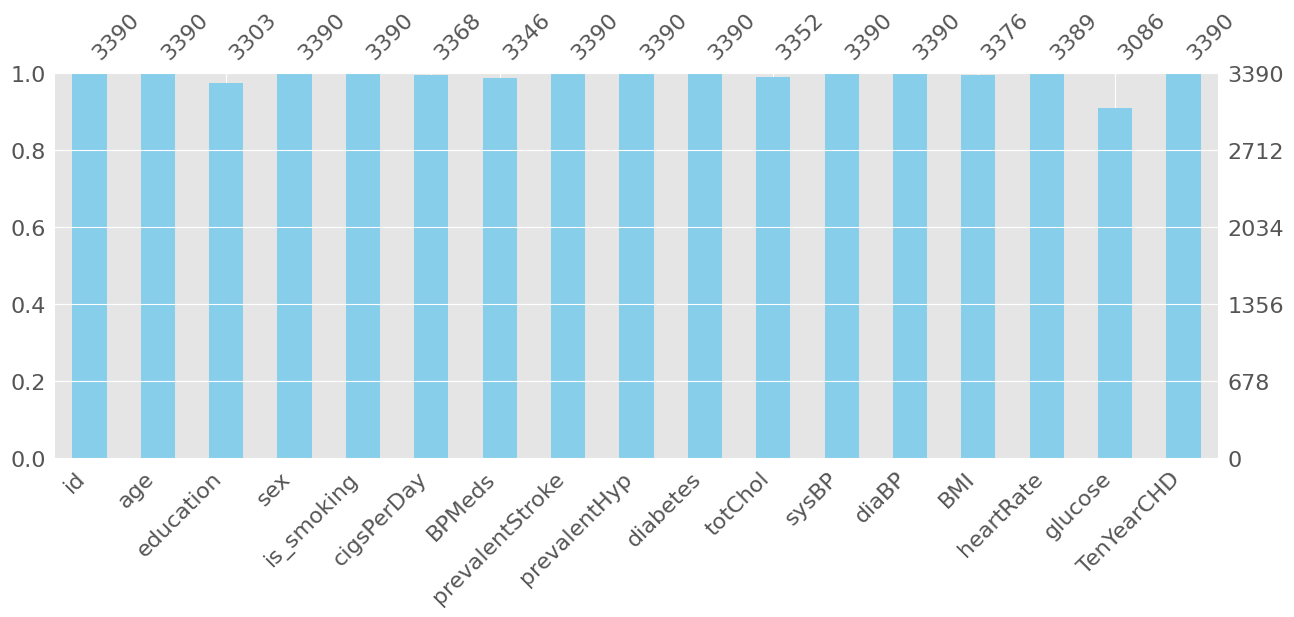

In [ ]:
# Use missingo library to visualize the missing value

msno.bar(df,figsize=(15,5),color="SkyBlue")

In [ ]:
# Filling up the NaN values of each feature

df['glucose'].fillna(df['glucose'].median(), inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace=True)
df['totChol'].fillna(df['totChol'].median(), inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['heartRate'].fillna(df['heartRate'].median(), inplace=True)

In [ ]:
df.isna().sum().sort_values(ascending=False)[:6]

id           0
diabetes     0
glucose      0
heartRate    0
BMI          0
diaBP        0
dtype: int64

- We have replaced null values from glucose, totChol,BMI and heartRate with median as they are containing high amount of outliers.
- Null values from categorical features like Education and BPmeds are replaced with mode.
- As CigsPerDay feature is having median value as zero and contains less number of outliers We have replaced null values within it with mean.

2. **Handling Outliers**

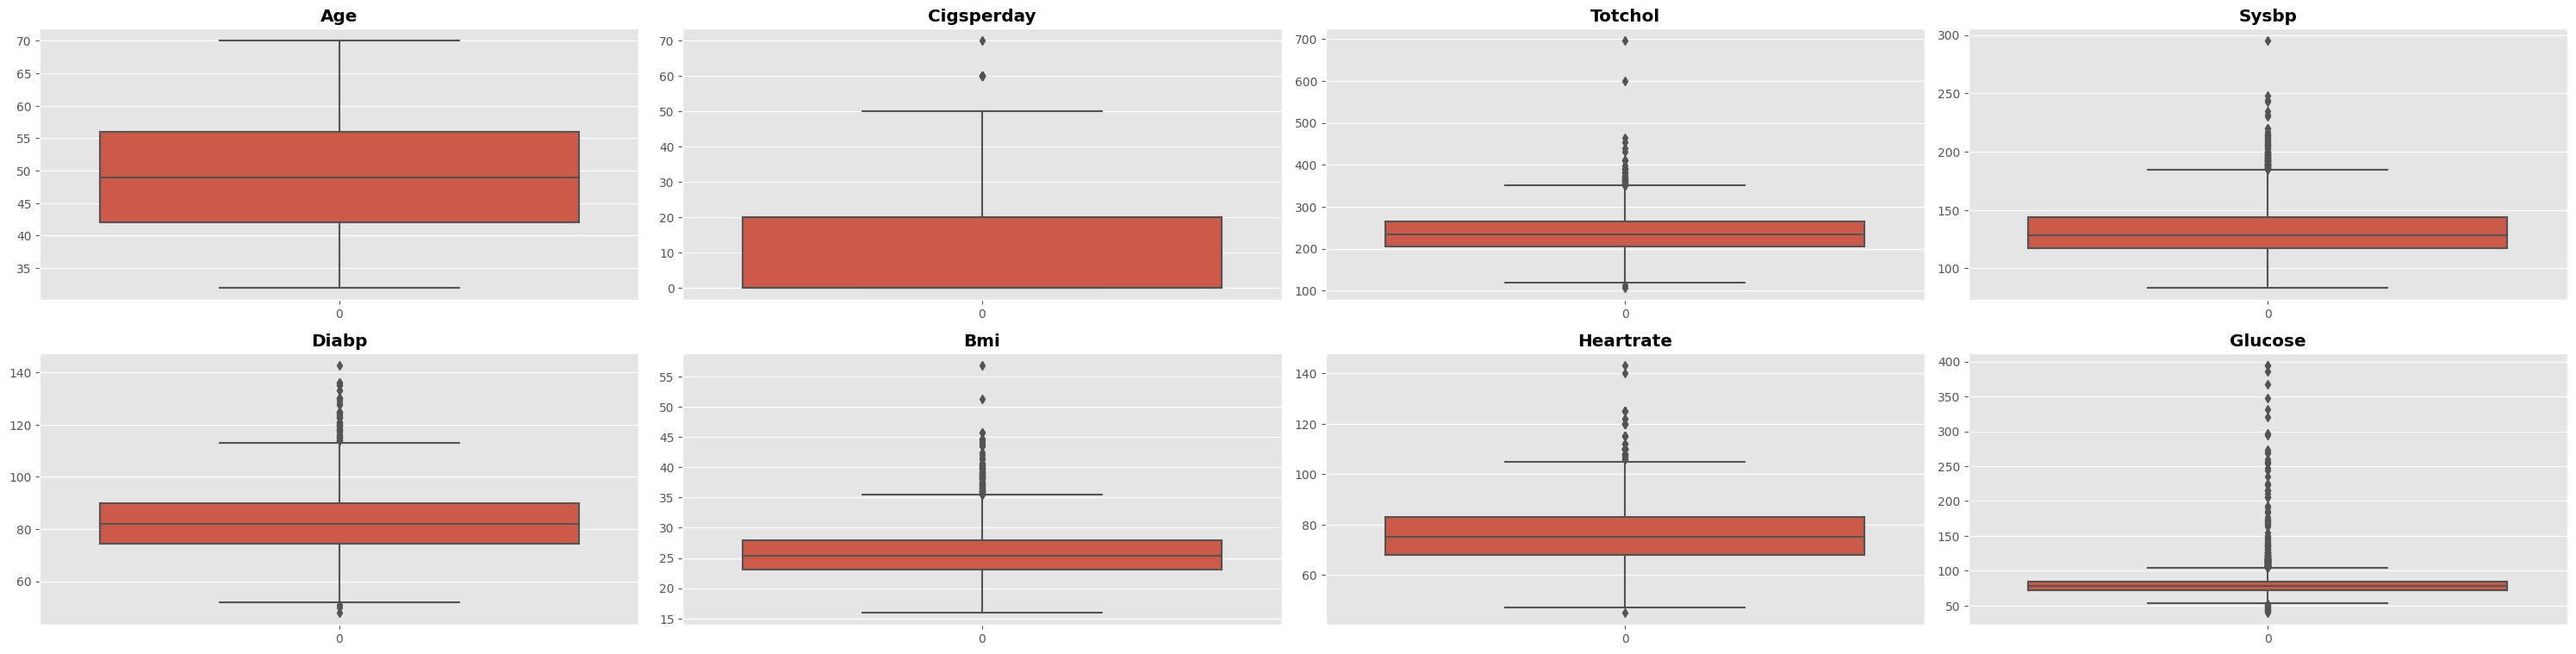

In [ ]:
# Box plot is better tool to understand about outliers,so plotting box plot for all the continous variable

plt.figure(figsize=(30,15))
for n,column in enumerate(continious_features):
  plt.subplot(4, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

Even though we are having outliers in our data we did not remove it. As our data is from medical domain and it is not good to loose any patients detail.

### Exploratory Data Analysis

In [ ]:
# Checking the unique values in each columns

print("Number of Unique values in each columns")
for i in df.columns:
  print(f"{i} : {df[i].nunique()}")

Number of Unique values in each columns
id : 3390
age : 39
education : 4
sex : 2
is_smoking : 2
cigsPerDay : 33
BPMeds : 2
prevalentStroke : 2
prevalentHyp : 2
diabetes : 2
totChol : 240
sysBP : 226
diaBP : 142
BMI : 1259
heartRate : 68
glucose : 132
TenYearCHD : 2


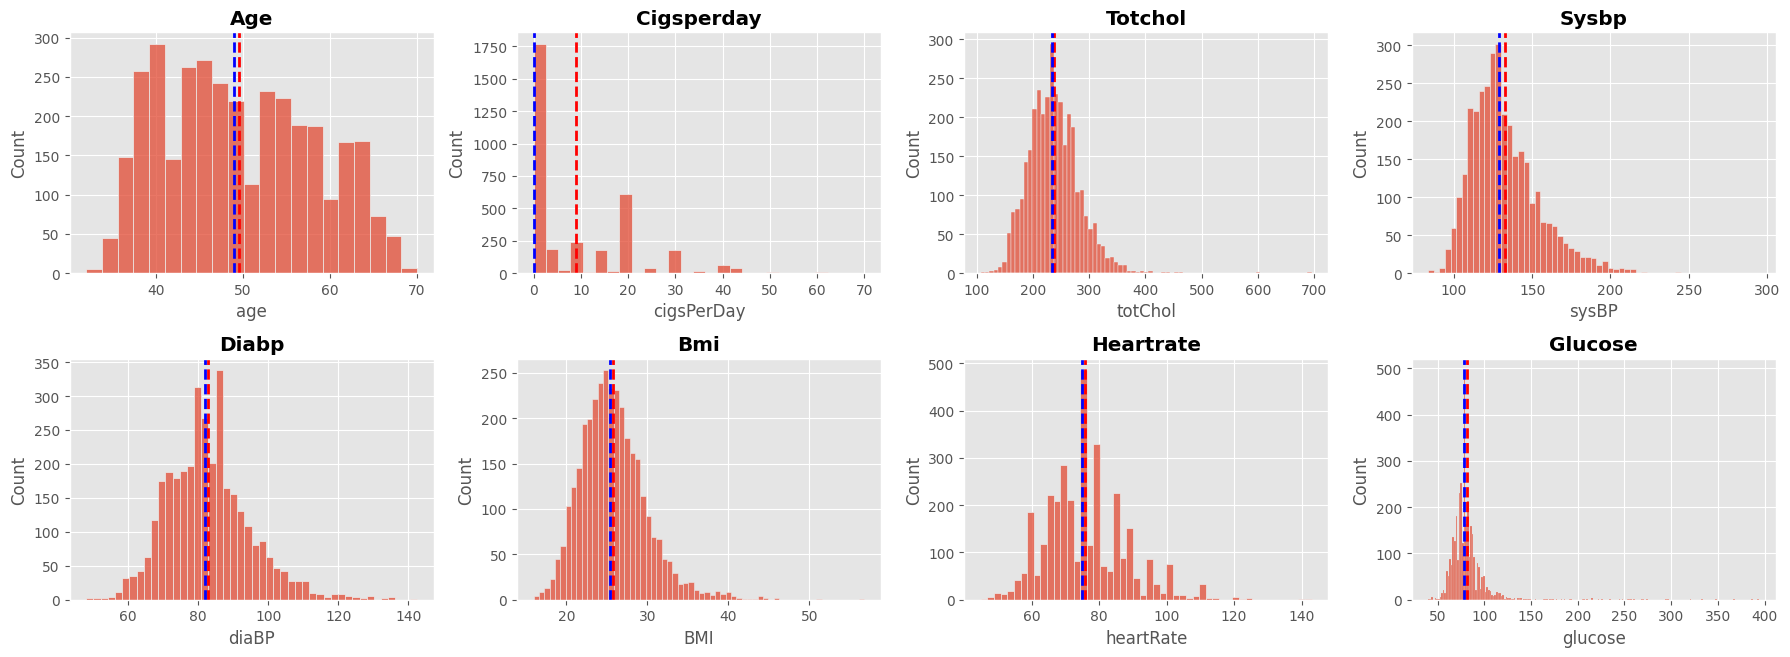

In [ ]:
# Distribution of continious features

# Visualizing the mean and median.
plt.figure(figsize=(18,16))
for n,column in enumerate(continious_features):
  feature = df[column]
  ax=plt.subplot(5, 4, n+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()


The insights we found are :-

* the majority of the individuals in the dataset are between 40-60 years old, with a few individuals who are younger than 30 or older than 70.

* the histogram could show that the majority of the individuals in the dataset smoke less than 10 cigarettes per day, with a few individuals smoking more than 20 cigarettes per day.

* the majority of the individuals in the dataset have total cholesterol levels between 200-250 mg/dL, with a few individuals having total cholesterol levels below 160 mg/dL or above 300 mg/dL.

* the majority of the individuals in the dataset have systolic blood pressure levels between 120-140 mmHg, with a few individuals having systolic blood pressure levels below 90 mmHg or above 160 mmHg.

* the majority of the individuals in the dataset have diastolic blood pressure levels between 80-90 mmHg, with a few individuals having diastolic blood pressure levels below 60 mmHg or above 100 mmHg.

* the majority of the individuals in the dataset have a body mass index between 24-26, with a few individuals having a body mass index below 18 or above 35.

* the majority of the individuals in the dataset have a heart rate between 60-90 beats per minute, with a few individuals having a heart rate below 50 beats per minute or above 100 beats per minute.

* the majority of the individuals in the dataset have a blood glucose level between 70-90 mg/dL, with a few individuals having a blood glucose level below 60 mg/dL or above 130 mg/dL.

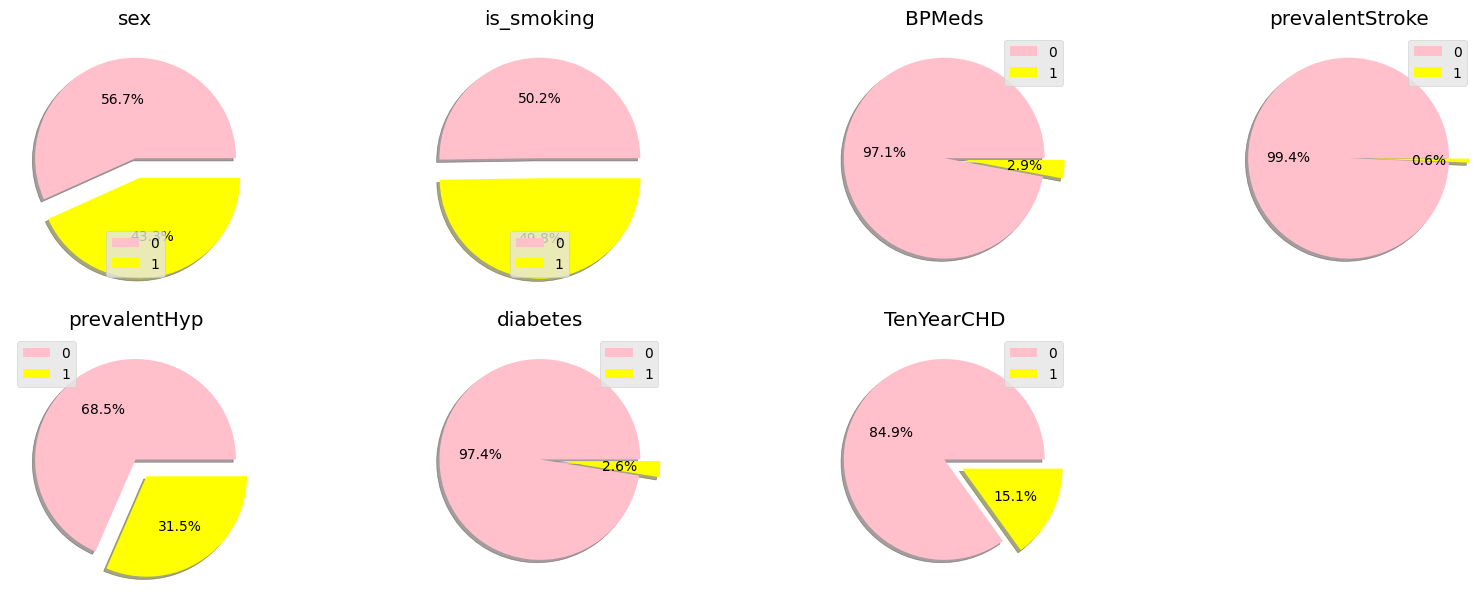

In [ ]:
# Distribution of categorical features

plt.figure(figsize=(20,15))
labels = '0','1'
colors = ['pink', 'yellow']
explode = [0, 0.2]
for i,j in enumerate(catogorical_features[1:]):
  plt.subplot(4,4,i+1)
  plt.pie(df[j].value_counts(),explode=explode,colors=colors, autopct='%1.1f%%', shadow=True)
  plt.legend(labels)
  plt.title(j)
plt.show()


In this dataset, 56.7% of individuals are female and rest are male.
50.24% of the individual in the dataset are smoke. Only 2.9% people are taking BP Medicines. 0.6% people had a history of strokes and 31.5 % hypertension respectively. 2.6% people have diabetes. 15.1% people have a chance of getting heart diseases in ten years.

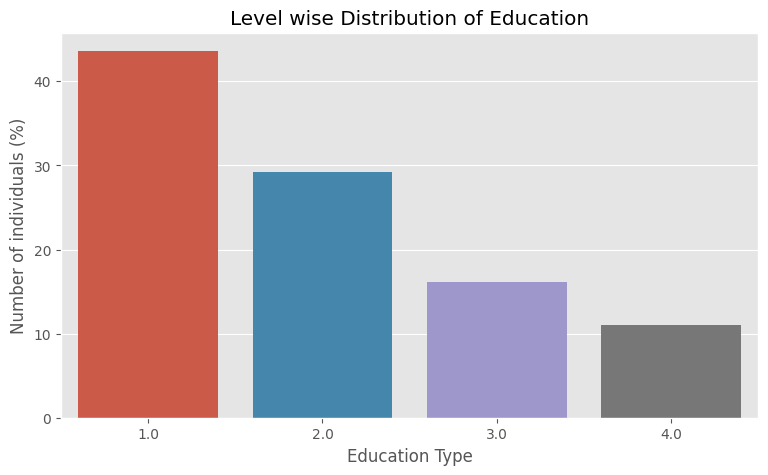

In [ ]:
# Distriution of Education feature

educat = pd.DataFrame(df["education"].value_counts()).reset_index().rename(columns={"index":"Education Type","education":"Number of individuals"})
educat["Number of individuals (%)"] = (educat["Number of individuals"]/educat["Number of individuals"].sum())*100
plt.figure(figsize=(9,5))
sns.barplot(data=educat,x="Education Type" , y="Number of individuals (%)")
plt.title("Level wise Distribution of Education")
plt.show()


In this Distribution most of the population has education level 1 which is above 40% and less that 15% population has education level 4.

In [ ]:
# Lets make copy of our dataset so that we keep if safe.

copy_df = df.copy()

In [ ]:
# In this dataset we have convert some features from text to number ie. encoding for Bivariate Analysis

copy_df["sex"] = copy_df['sex'].replace({'M':1,'F':0})
copy_df["is_smoking"] = copy_df['is_smoking'].replace({'YES':1,'NO':0})
copy_df

id  age  education  sex  is_smoking  cigsPerDay  BPMeds  \
0        0   64        2.0    0           1         3.0     0.0   
1        1   36        4.0    1           0         0.0     0.0   
2        2   46        1.0    0           1        10.0     0.0   
3        3   50        1.0    1           1        20.0     0.0   
4        4   64        1.0    0           1        30.0     0.0   
...    ...  ...        ...  ...         ...         ...     ...   
3385  3385   60        1.0    0           0         0.0     0.0   
3386  3386   46        1.0    0           0         0.0     0.0   
3387  3387   44        3.0    1           1         3.0     0.0   
3388  3388   60        1.0    1           0         0.0     0.0   
3389  3389   54        3.0    0           0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    221.0  148.0   85.0  25.38   
1                   0             1         0    212.0  168.0   98.0  29.77   
2                   0             0         0    250.0  116.0   71.0  20.35   
3                   0             1         0    233.0  158.0   88.0  28.26   
4                   0             0         0    241.0  136.5   85.0  26.42   
...               ...           ...       ...      ...    ...    ...    ...   
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
0          90.0     80.0           1  
1          72.0     75.0           0  
2          88.0     94.0           0  
3          68.0     94.0           1  
4          70.0     77.0           0  
...         ...      ...         ...  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0  

[3390 rows x 17 columns]

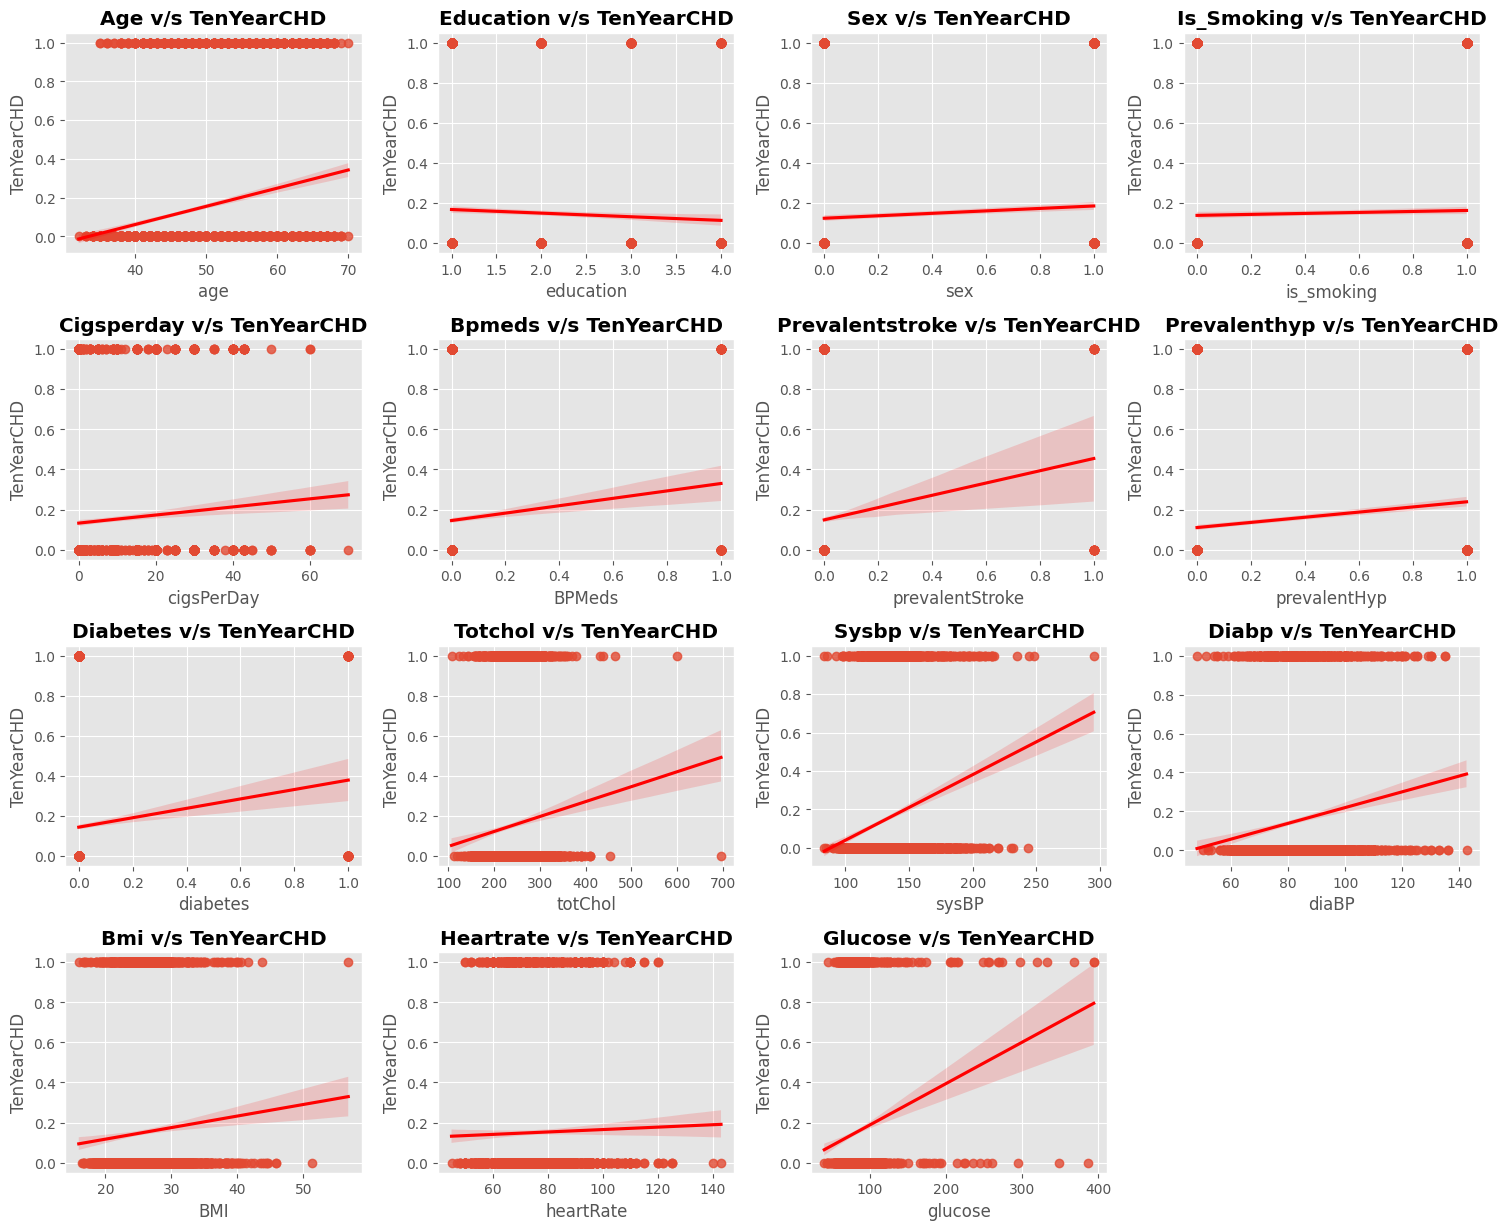

In [ ]:
# Bivariate Analysis

plt.figure(figsize=(15,15))
for n,column in enumerate(copy_df.columns[1:-1] ):
  plt.subplot(5, 4, n+1)
  sns.regplot(x = copy_df[column], y = copy_df['TenYearCHD'], line_kws={"color": "red"})
  plt.title(f'{column.title()} v/s TenYearCHD',weight='bold')
  plt.tight_layout()


Age, cigsperday, Bpmeds, prevalentstroke, prevalenthyp, Diabetes, Totchol, Sysbp, Diabp, Bmi, Glucose are highely positive correlation with TenYearCHD

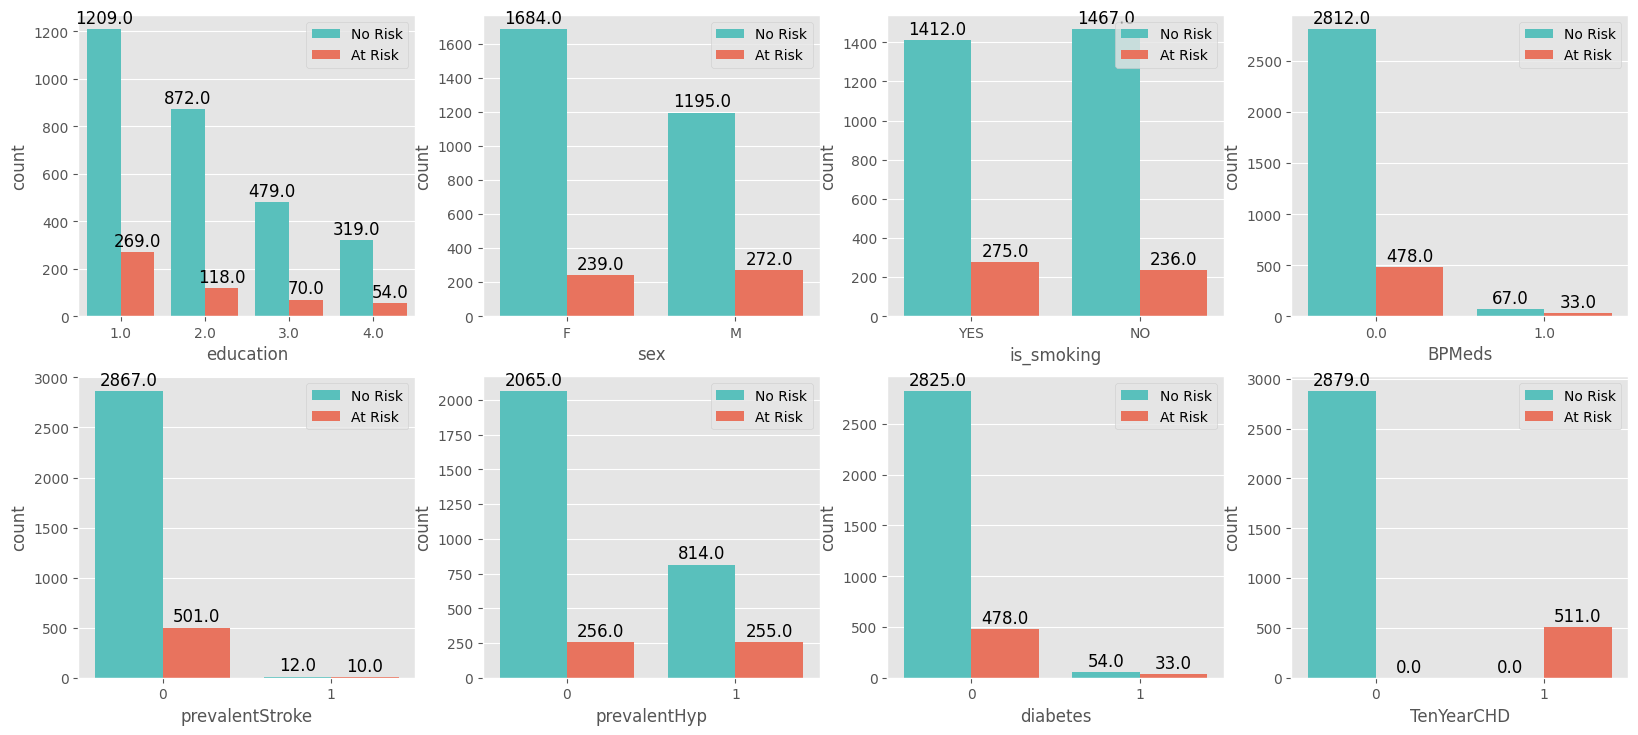

In [ ]:
# Categorical features with target variables.

plt.figure(figsize=(20,18))
for i,j in enumerate(catogorical_features):
  plt.subplot(4,4,i+1)
  plots = sns.countplot(data = df, x=j, hue= copy_df['TenYearCHD'], palette=['mediumturquoise',"tomato"])
  plt.legend(['No Risk', 'At Risk'])

  for bar in plots.patches:
      plots.annotate(bar.get_height(),
                     (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                     size=12, xytext=(0, 8),
                     textcoords='offset points')
plt.show()

From the above count plots , we can clearly see that BP Problems , prevalent strokes , prevalent hypertension and dieabetes does have a great impact on getting Heart Diseases.

- Residents who are at education Level-1 are having slightly more percentage of getting suffered from CHD as compared to other education levels.
- Males are more prone to CHD as compared to females.
- Smokers are having slight more chances of suffering from CHD than non-smokers.
- Residents who are not on a BP medication are having minimal chances as compared to medicated patients of suffering to CHD.
- Patients who are having stroke or hypertention history, diabetes are more prone to CHD.

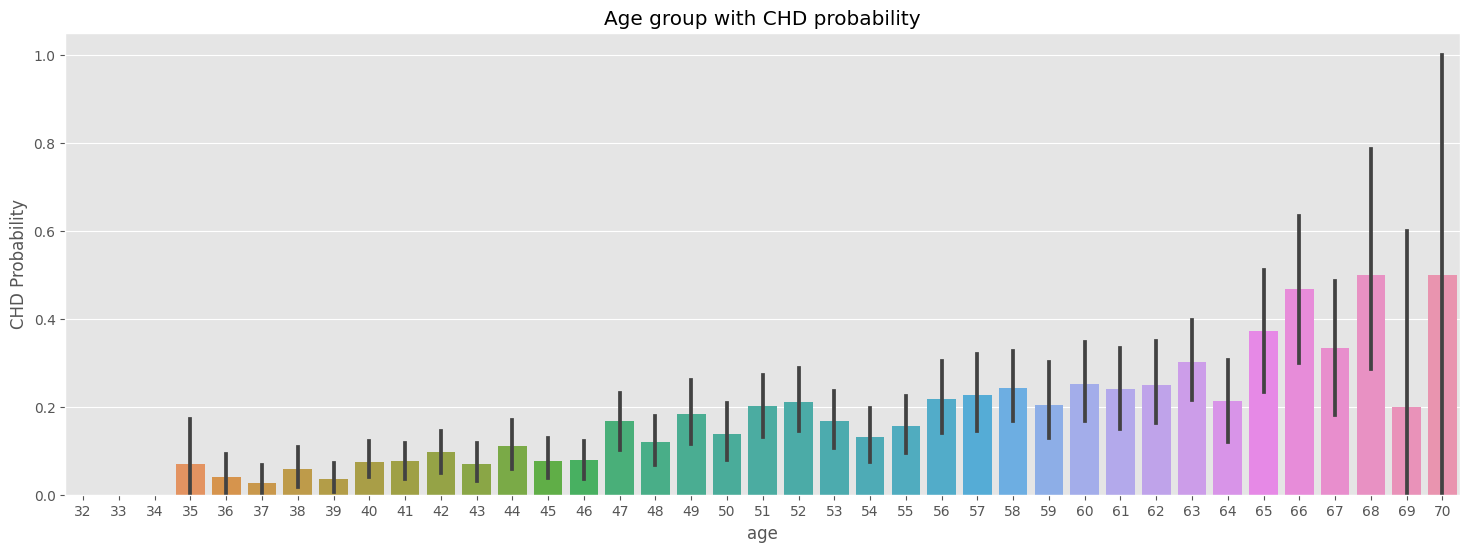

In [ ]:
# To know which age group is more vulnerable to CHD ?

plt.figure(figsize=(18,6))
ax = sns.barplot(x = 'age', y = 'TenYearCHD', data = df)
plt.ylabel('CHD Probability')
plt.title("Age group with CHD probability")
plt.show()

In above I can see that Age and TenYearCHD are correlated to each other, ie. if age is increase then chance of having cardiovascular Heart disease also increase. Here we can see that from Above 65 age there is high probability to have cardiovascular heart disease.

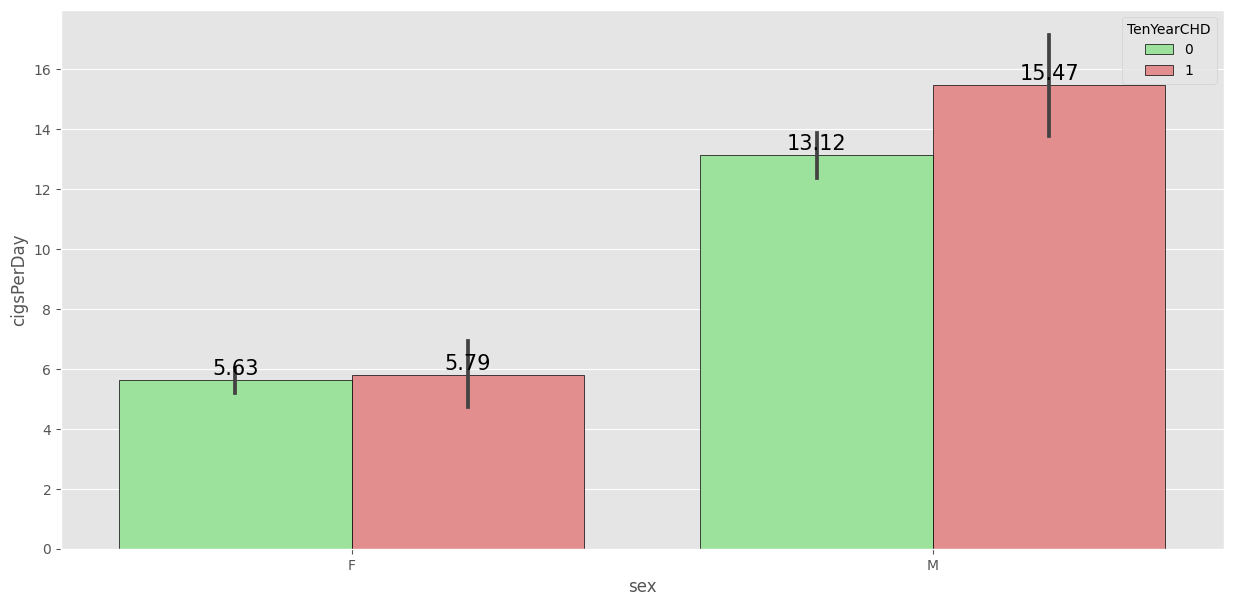

In [ ]:
# Lets see the sexwise distribution of smokers and nonsmokers with risk of CHD

plt.figure(figsize=(15,7))
plots=sns.barplot(x=df['sex'],y=df['cigsPerDay'],palette=["lightgreen","lightcoral"],hue=df['TenYearCHD'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

- There are more males consuming cigarattes as compared to females.
- Under male category, males who are consuming more cigarettes are at a risk of getting Heart Diseases while in females there are equal chances for smokers or non-smokers to get affected by CHD.

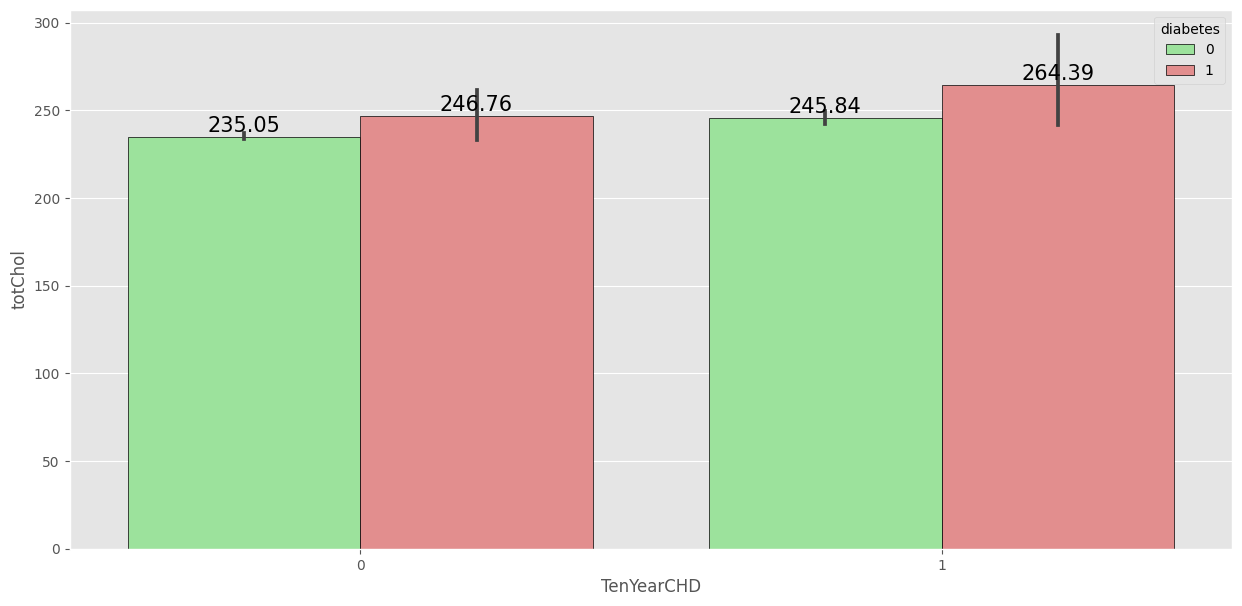

In [ ]:
# Lets see the cholestrol levels related to CHD and Diabetes

plt.figure(figsize=(15,7))
plots=sns.barplot(y=df['totChol'],x=df['TenYearCHD'],palette=["lightgreen","lightcoral"],hue=df['diabetes'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

- Individual with cholestrol which having diabetes and individual with cholestrol not having diabetes having equal change of having risk of CHD.

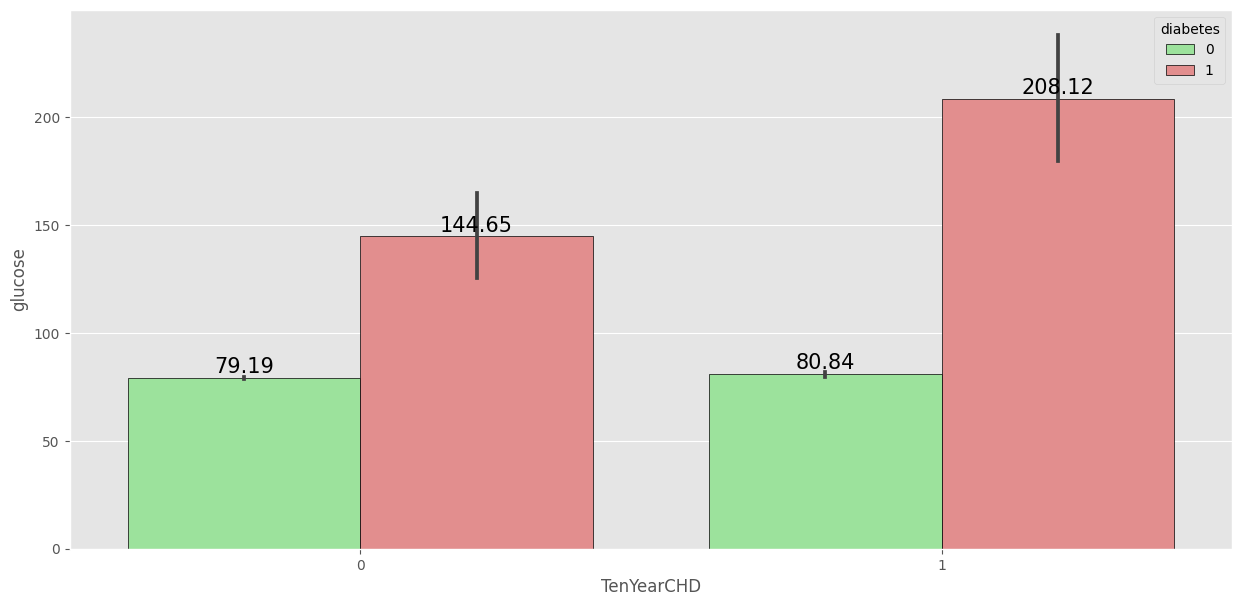

In [ ]:
# Lets see the Glocose levels impacted by CHD and Diabetes.

plt.figure(figsize=(15,7))
plots=sns.barplot(y=df['glucose'],x=df['TenYearCHD'],palette=["lightgreen","lightcoral"],hue=df['diabetes'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

- From above I see that individual with high glucose has risk of having cardiovascular disease, which increase the chance of diabetic patient to has risk of cardiovascular disease.

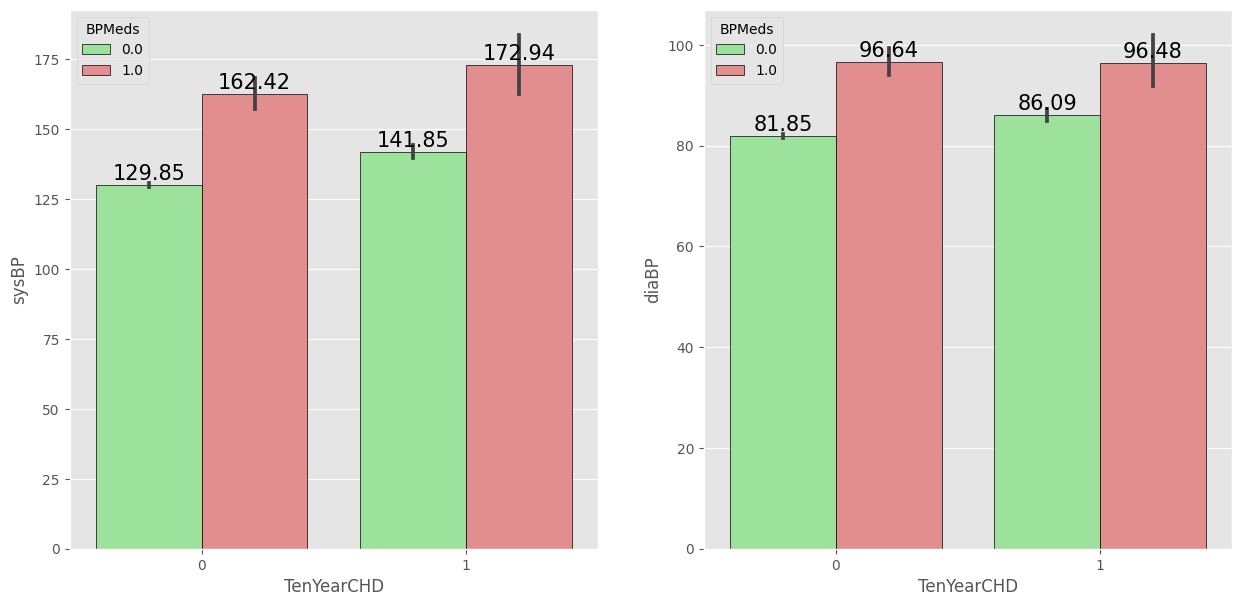

In [ ]:
# lets see Are patients with Systolic and Diastolic BP at risk of CHD or not?

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plots=sns.barplot(y=df['sysBP'],x=df['TenYearCHD'],palette=["lightgreen","lightcoral"],hue=df['BPMeds'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.subplot(1,2,2)
plots=sns.barplot(y=df['diaBP'],x=df['TenYearCHD'],palette=["lightgreen","lightcoral"],hue=df['BPMeds'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

Blood pressure is measured using two numbers: The first number, called systolic blood pressure, measures the pressure in your arteries when your heart beats. The second number, called diastolic blood pressure, measures the pressure in your arteries when your heart rests between beats.

- From above I observed that patient who are on BP medication are having high sysBP and diaBP.Even these patients are having high chances of getting suffered from CHD.

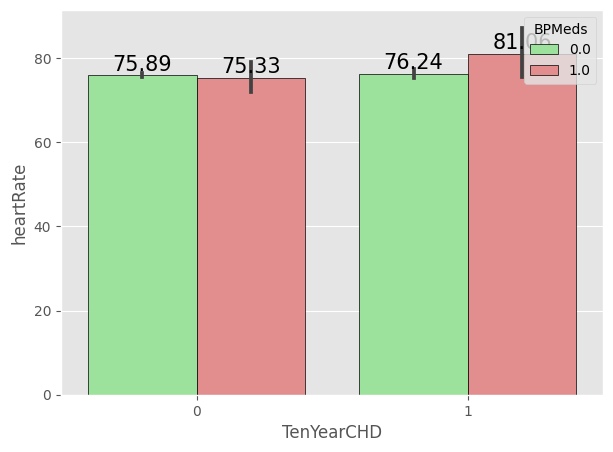

In [ ]:
# Lets see, heartRate is related to CHD considering patient with Bp medication ?

plt.figure(figsize=(7,5))
plots=sns.barplot(x=df['TenYearCHD'],y=df['heartRate'],hue=df['BPMeds'],edgecolor='black',palette=["lightgreen","lightcoral"])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

- From above, The patient with high heart rate who is on BP medication has high risk of having Cardiovascular disease.

<Axes: >

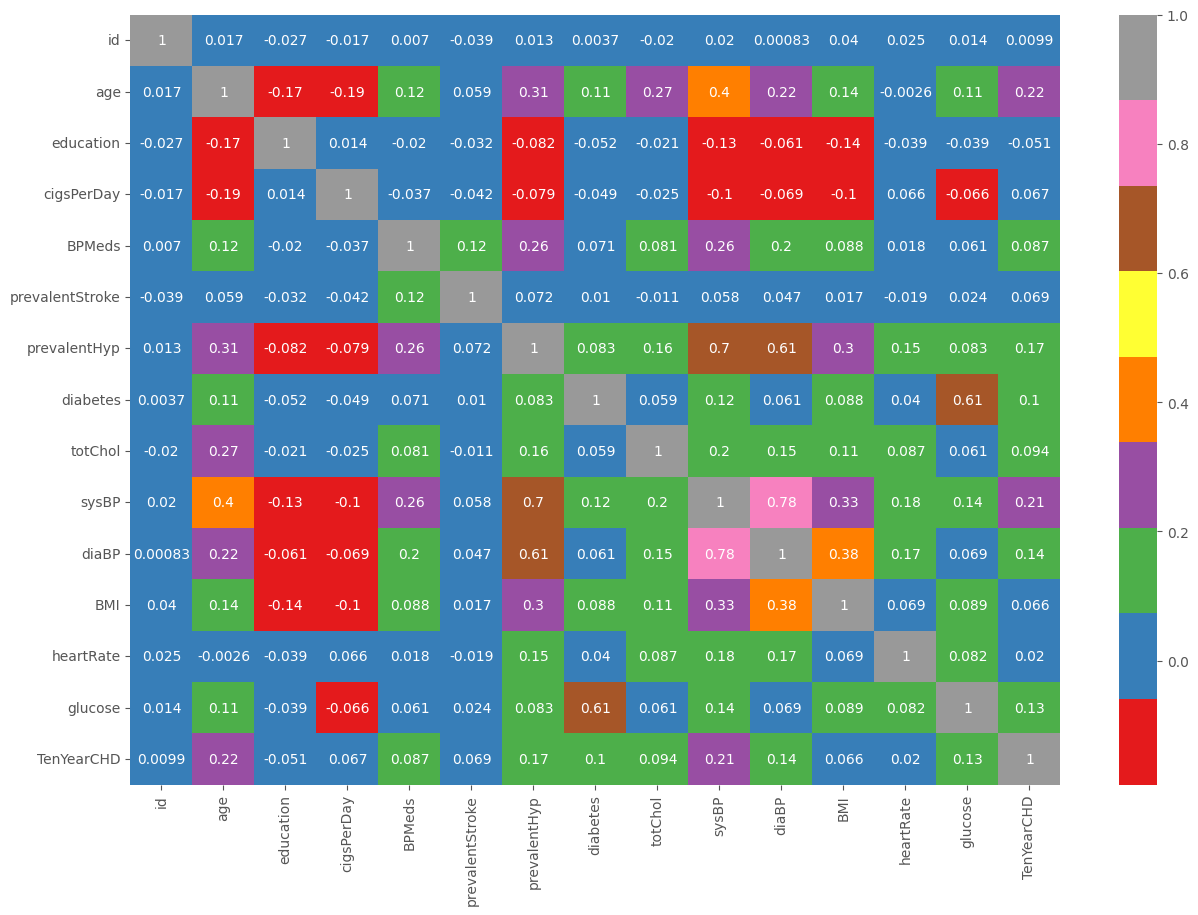

In [ ]:

# Correlation Matrix to understand the relationship betwen

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap=sns.color_palette("Set1"))

I can see the strong correlation between,

1. sysBP and diaBP
2. sysBP and prevalentHyp
3. diaBP and prevalentHyp
4. glucose and diabetes


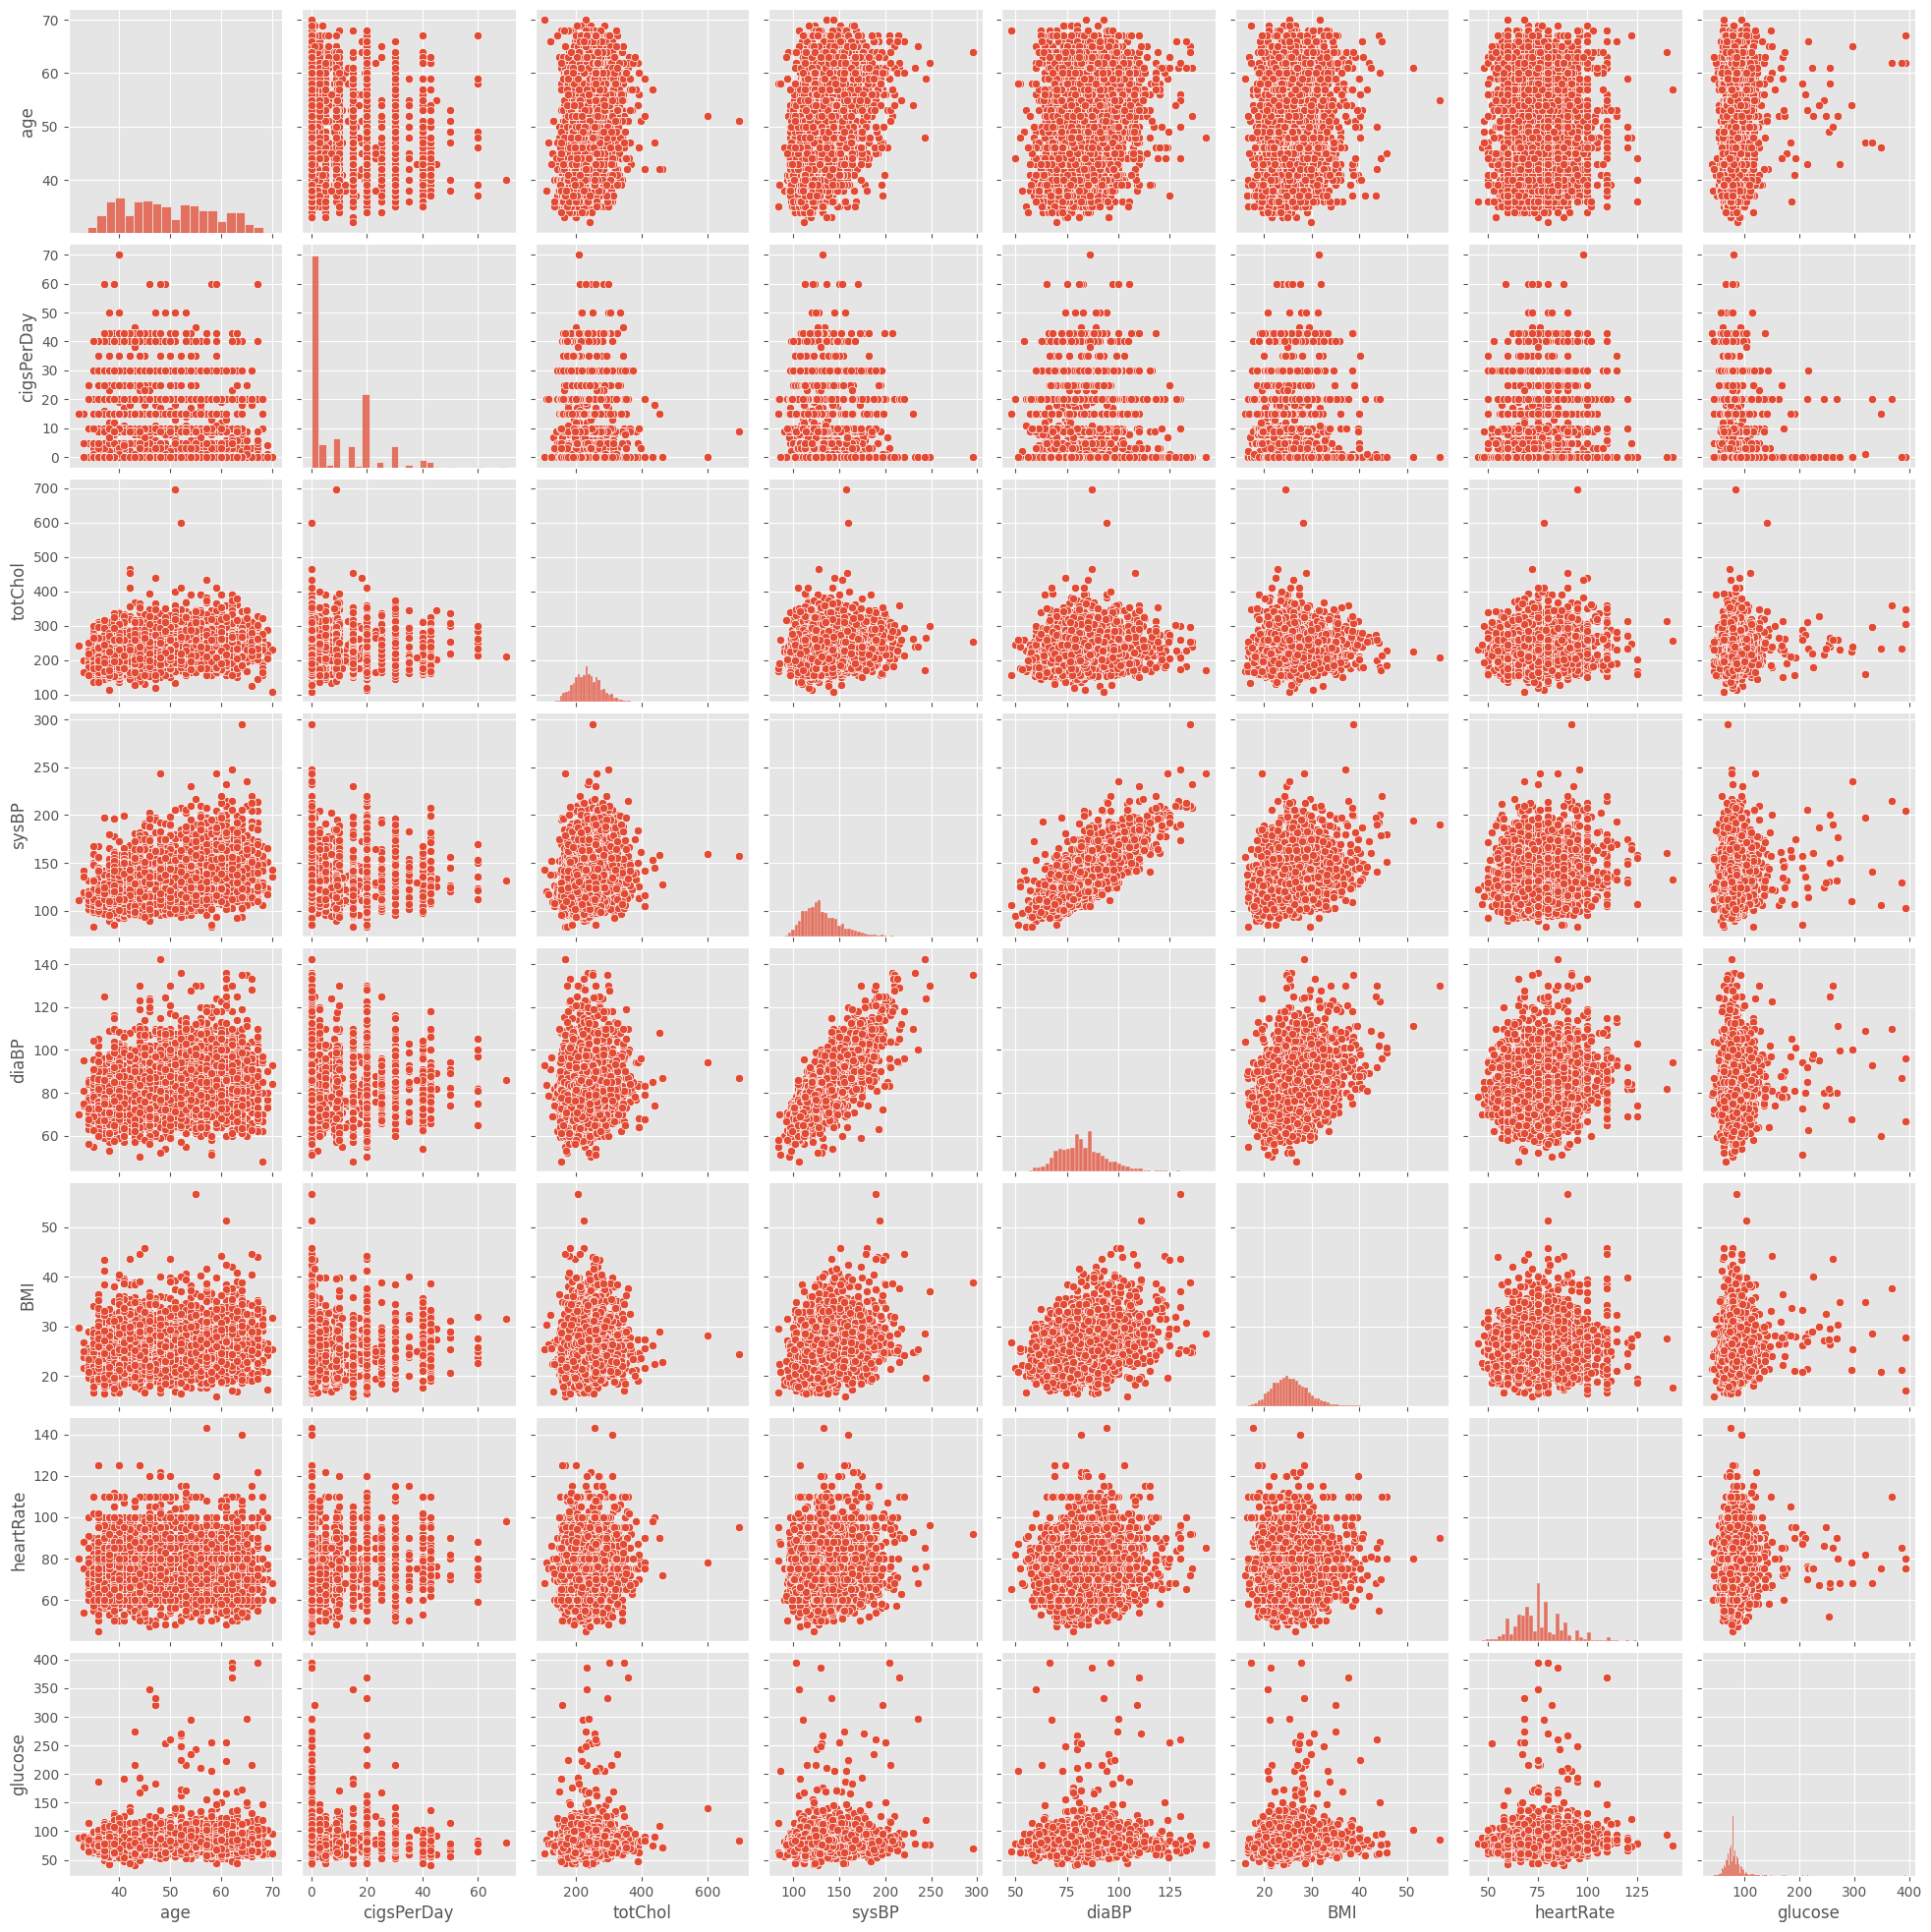

In [ ]:
# To understand this I draw the pairplot

sns.pairplot(df[continious_features])
plt.show()

Here I clearly see the relationship between the continious variable.


### **Hypothesis Testing**

####1. **Is there significant difference in the mean age between individuals with and without prevalent hypertension ?**

In [ ]:
# Hypothesis test 1

from scipy import stats               # Import scipy which is useful for statistical test.


# Define the hypothesis
'''

Null Hypothesis (H0)           : There is no significant difference in the mean age between individuals with and without prevalent hypertension.
Alternative Hypothesis (H1)    : There is a significant difference in the mean age between individuals with and without prevalent hypertension.

'''

# Select the relevant columns
with_hypertension = df[df['prevalentHyp'] == 1]
without_hypertension = df[df['prevalentHyp'] == 0]


# Calculate test statistics and p value .
t_statistics, p_value = stats.ttest_ind(with_hypertension['age'], without_hypertension['age'])
print(f"t_statistics: {t_statistics}")
print(f"P_Value: {p_value : .2f}")

# Interpret p-value
alpha = 0.05
if p_value < alpha:
  print("Reject the null hypothesis. There is a significant difference in mean age between individuals with and without prevalent hypertension.")
else :
  print("Fail to reject the null hypothesis. There is no significant difference in mean age between individuals with and without prevalent hypertension.")

t_statistics: 18.899513602241676
P_Value:  0.00
Reject the null hypothesis. There is a significant difference in mean age between individuals with and without prevalent hypertension.


####2. **Is there any relationship between age and CHD ?**







In [ ]:
# Hypothesis test
from scipy.stats import chi2_contingency

'''

Null Hypothesis(H0)         :  There is no significant relationship between age and CHD.
Alternative Hypothesis(H1)  :  There is significant relationship between age and CHD.


'''

# Assuming this data is our dataframe
contingency_table = pd.crosstab(df['age'], df['TenYearCHD'])

# Perform the chi-squared test
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi_sq_statistics : {chi2}")
print(f"P_value : {p_value}")

# Check if the p-value is less than alpha
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is significant relationship between age and CHD.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between age and CHD.")

Chi_sq_statistics : 205.2255233856175
P_value : 8.20034951967931e-25
Reject the null hypothesis. There is significant relationship between age and CHD.


####3. **is the mean of total cholesterol is equal to 237 ?**

In [ ]:
# Hypothesis 3

'''

Null Hypothesis (H0)          : The mean of total cholesterol is equal to 237. ie. u = 237
Alternative Hypothesis (H1)   : The mean of total cholesterol is not equal to 237. u != 237

'''


# Assuming Data
total_cholesterol = df['totChol']

# Perform a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(total_cholesterol, 237)

# Check if the p-value is less than alpha
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The mean of total cholesterol is not equal to 237. u != 237.")
else:
    print("Fail to reject the null hypothesis. The mean of total cholesterol is equal to 237. u = 237.")

Fail to reject the null hypothesis. The mean of total cholesterol is equal to 237. u = 237.


### **Feature Engineering**

In [ ]:
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0  25.38       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [ ]:
# Creating feature pulse_pressure using sysBP and diaBP

df['pulse_pressure'] = round(df['sysBP']-df['diaBP'],2)

In [ ]:
# Create the new feature glucose_diabetes using highely correlated features diabetes and glucose.

df['glucose_diabetes'] = ((df['glucose'] > 140) & (df['diabetes']==1)).astype('int')

Since glucose and diabetes are highly correlated, which is quite obvious as well. If a person has high glucose level (>140) then there are higher chances that the patient can suffer from Diabetes.So, let's create new feature as glucose_diabetes by using these two features

<Axes: >

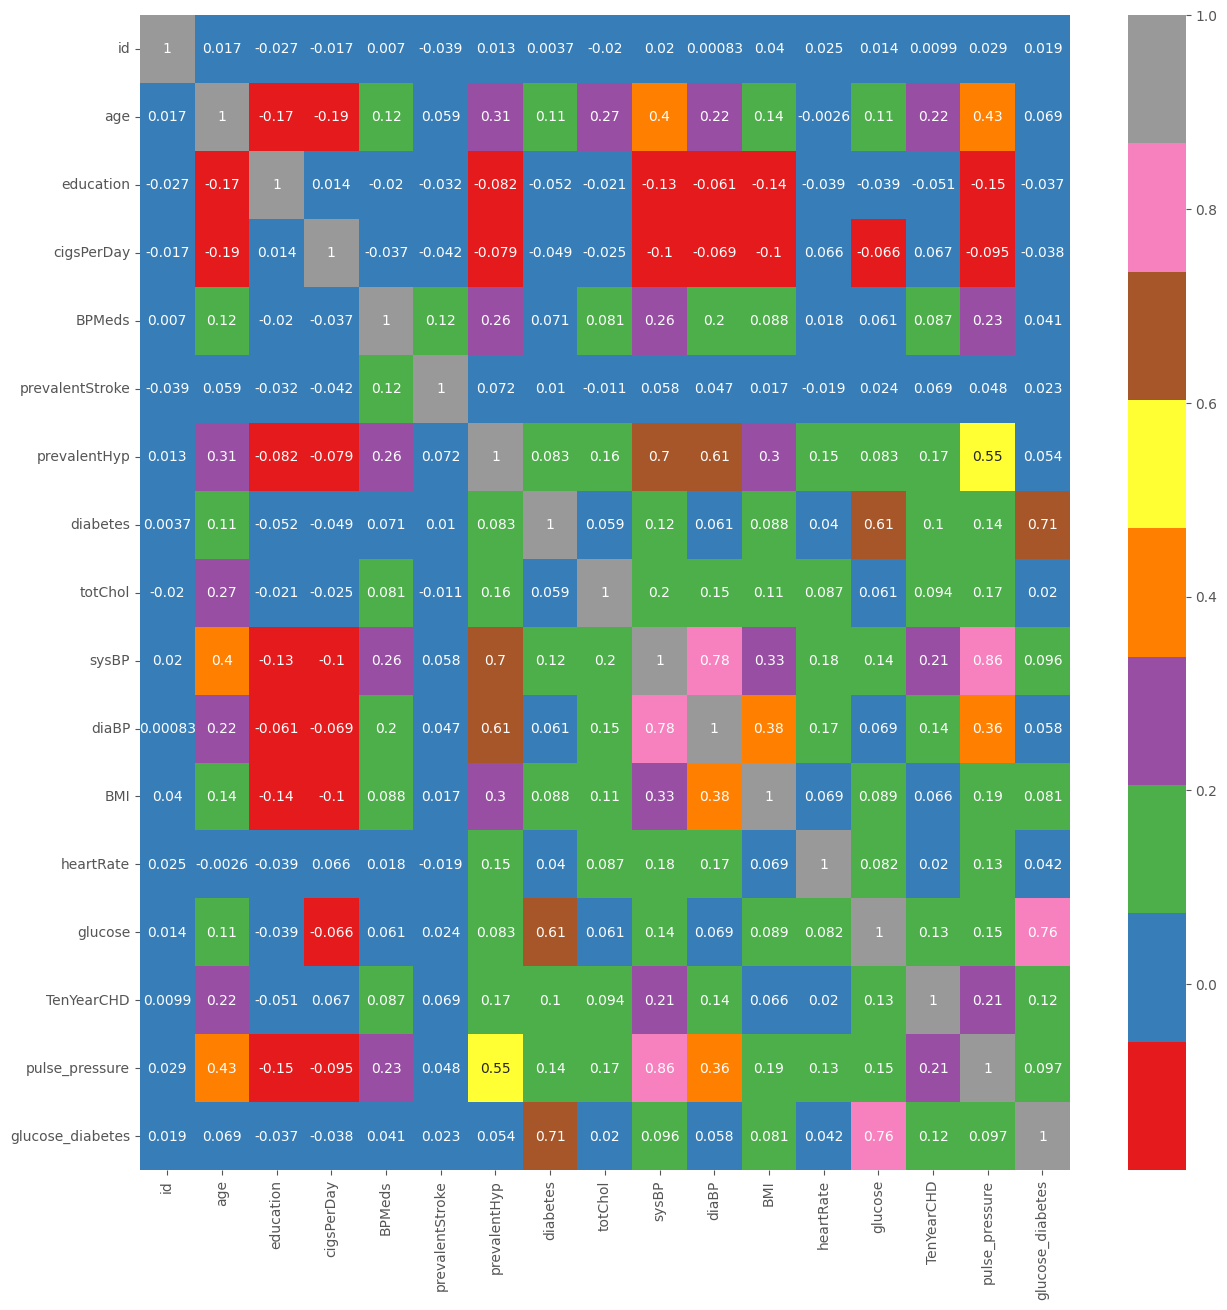

In [ ]:
# understand the relationship of features
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap=sns.color_palette("Set1"))

Let's include only those features in our final dataframe that are highly impacting on the dependent variable 'TenYearCHD'. For this we are using Variance Inflation Factor technique to determine multicolinearity .

In [ ]:
# Finding the variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# created a function for variance inflation factor.
def vif(x):
  VIF = pd.DataFrame()
  VIF['features'] = x.columns
  VIF['vif'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
  return VIF

**calculate the variance inflation factor by excluding the variable id, TenYearCHD and sysBP, diaBP, glucose, diabetes also because we have already created two new features using them**.


In [ ]:
# calculate vif

vif(df[[i for i in df.describe().columns if i not in ['id','TenYearCHD','sysBP','diaBP','glucose','diabetes']]])

features        vif
0                age  38.504067
1          education   4.407655
2         cigsPerDay   1.630641
3             BPMeds   1.128855
4    prevalentStroke   1.026359
5       prevalentHyp   2.071982
6            totChol  29.921590
7                BMI  33.336386
8          heartRate  32.148365
9     pulse_pressure  19.616431
10  glucose_diabetes   1.025723

Let's exclude the feature 'totChol', 'BMI', 'heartRate' as they having high VIF, because of that they does not impacting much on output variable.

In [ ]:
# VIF after excluding the high correlated feature

vif(df[[i for i in df.describe().columns if i not in ['id','TenYearCHD','sysBP','diaBP','glucose','diabetes','totChol','BMI','heartRate']]])

features        vif
0               age  18.028544
1         education   3.951746
2        cigsPerDay   1.531861
3            BPMeds   1.123783
4   prevalentStroke   1.025250
5      prevalentHyp   2.045176
6    pulse_pressure  18.225294
7  glucose_diabetes   1.024465

In [ ]:
# encoding the feature sex from dataframe
df["sex"] = df['sex'].replace({'M':1,'F':0})

# Create the final dataset for further Analysis.
final_df= df[['age', 'education','sex','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','pulse_pressure','glucose_diabetes','TenYearCHD']]
final_df.head()

age  education  sex  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0   64        2.0    0         3.0     0.0                0             0   
1   36        4.0    1         0.0     0.0                0             1   
2   46        1.0    0        10.0     0.0                0             0   
3   50        1.0    1        20.0     0.0                0             1   
4   64        1.0    0        30.0     0.0                0             0   

   pulse_pressure  glucose_diabetes  TenYearCHD  
0            63.0                 0           1  
1            70.0                 0           0  
2            45.0                 0           0  
3            70.0                 0           1  
4            51.5                 0           0

###**Data Tranformation**

Before Applying Transformation :
--------------------------------
Skewness of 'age','cigsPerDay'and 'pulse_pressure': 0.23, 1.23, 1.41
----------------------------------------------------------------------


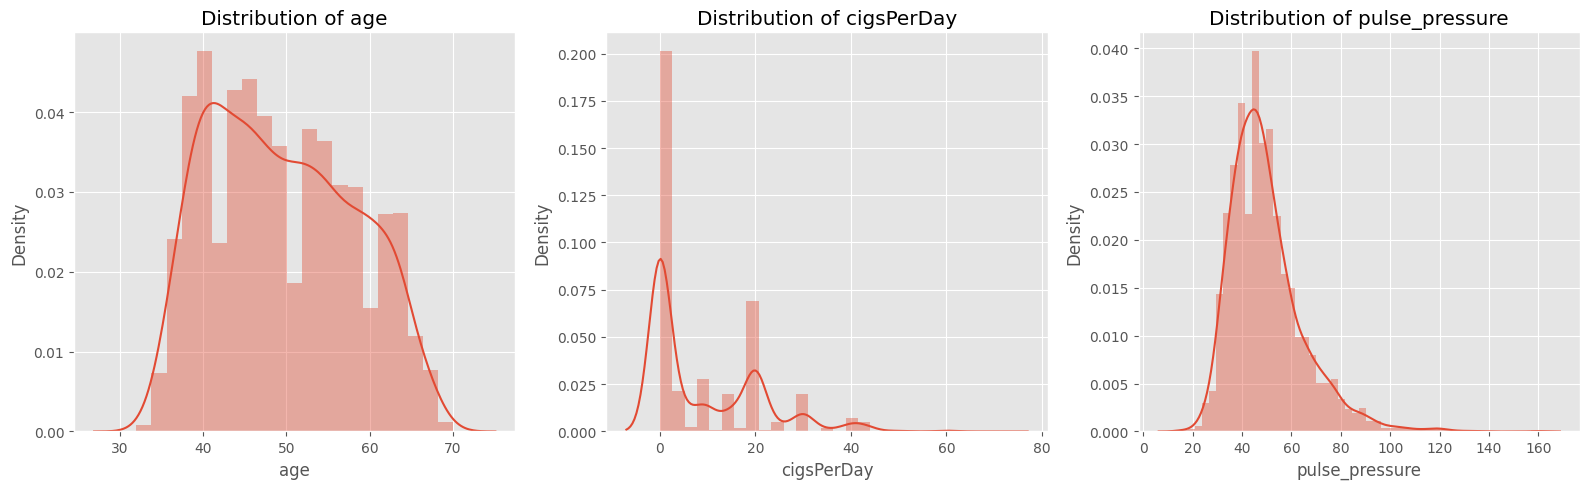

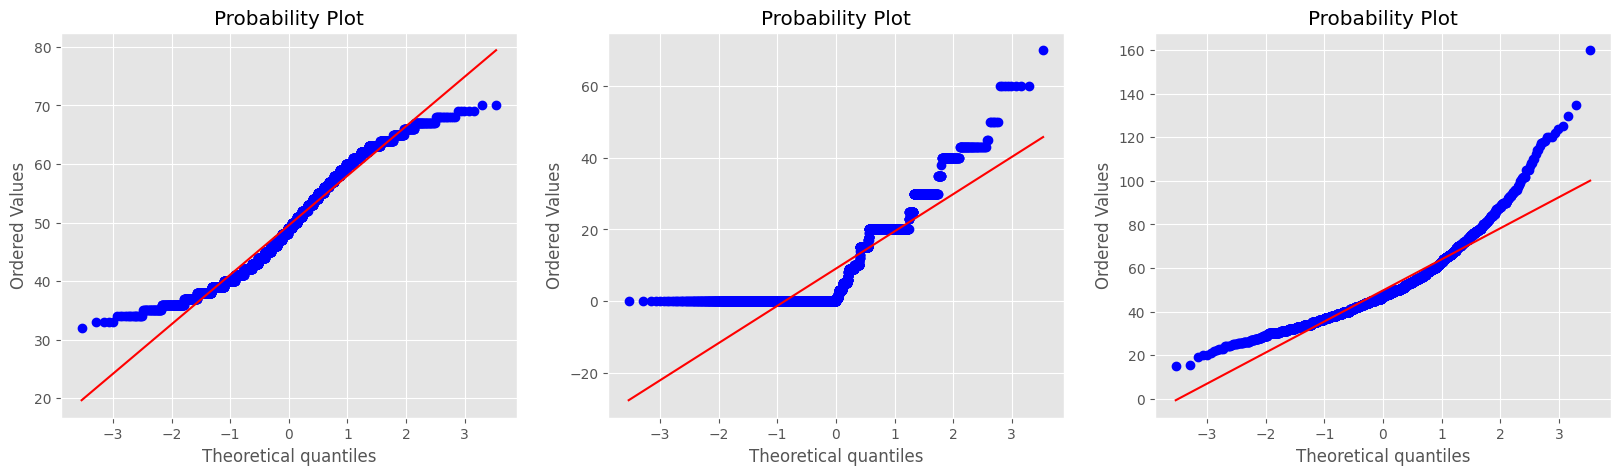

In [ ]:
# Creating the function
def plot_data(df,feature):
    stat.probplot(df[feature],dist='norm',plot=pylab)

# Checking the distribution and Q-Q plot of each continous variable from our final dataframe

plt.figure(figsize=(16,5))
print("Before Applying Transformation :")
print("-"*32)
print(f"Skewness of 'age','cigsPerDay'and 'pulse_pressure': {round(final_df['age'].skew(),2)}, {round(final_df['cigsPerDay'].skew(),2)}, {round(final_df['pulse_pressure'].skew(),2)}")
print("-"*70)

for n,col in enumerate(['age','cigsPerDay','pulse_pressure']):
  plt.subplot(1,3,n+1)
  sns.distplot(final_df[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

plt.figure(figsize=(20,5))
for num,column in enumerate(['age','cigsPerDay','pulse_pressure']):
  plt.subplot(1,3,num+1)
  plot_data(final_df,column)

plt.show()

Here the variable age need to be tranform, So we are decide to apply logarithmatic tranformation here.


In [ ]:
# Applying logarithmic transformation on age feature

final_df['age']=np.log(final_df['age']+1)

### **Data Splitting**


In [ ]:
# Split the Data into training and testing set

X = final_df.drop(columns='TenYearCHD' , axis=1)
y = final_df['TenYearCHD']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Distribution of class in dependent variable.
for col, label in [[y_train,"Train"],[y_test,"Test"]]:
  print(f"Distribution of class in {label}")
  print(col.value_counts(), '\n')

Distribution of class in Train
0    2314
1     398
Name: TenYearCHD, dtype: int64 

Distribution of class in Test
0    565
1    113
Name: TenYearCHD, dtype: int64 



**Above I can see the class imbalance problem, so we have to fix it.**

### **Handling class imbalance**
Data set is highly imbalanced, which is obvious. Number of people prone to cardiovascular diseases will be less as compared to number of people who are not prone, numbers denoted for people who are prone is 1 and who are not prone is 0, and this imbalanced data will give highly biased results.

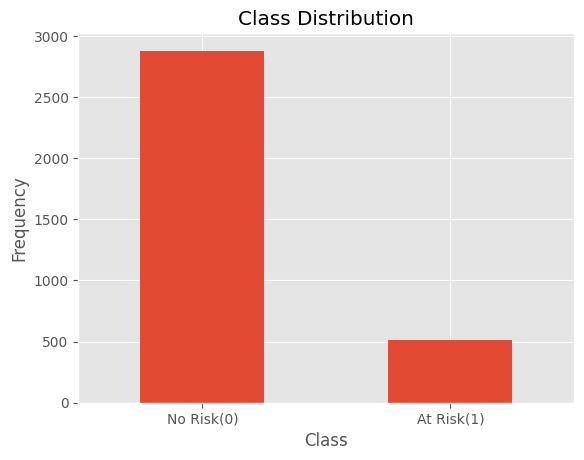

In [ ]:
# Visualizing the imbalanced class
count_classes = pd.value_counts(final_df['TenYearCHD'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Class Distribution")
plt.xticks(range(2), ['No Risk(0)', 'At Risk(1)'])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Importing SMOTE for balancing the dataset
from imblearn.over_sampling import SMOTE

# Fitting the data
smote = SMOTE(sampling_strategy='minority', random_state=0)
x_resample, y_resample = smote.fit_resample(X, y)

# Checking Value counts for both classes Before and After handling Class Imbalance:
for col,label in [[y,"Before"],[y_resample,'After']]:
  print(label+' Handling Class Imbalace:')
  print(col.value_counts(),'\n')

Before Handling Class Imbalace:
0    2879
1     511
Name: TenYearCHD, dtype: int64 

After Handling Class Imbalace:
1    2879
0    2879
Name: TenYearCHD, dtype: int64 



In [ ]:
# Respliting the Data using balance classes.

x_train_res, x_test_res, y_train_res, y_test_res = train_test_split(x_resample, y_resample, test_size=0.2)

### **Data Scaling**
Data scaling is important, because feature with different scale can lead to the poor performance.


In [ ]:
# Creating object
stand_scale = StandardScaler()

# Tranform the variables
x_train_res = stand_scale.fit_transform(x_train_res)
x_test_res = stand_scale.transform(x_test_res)

### **Model Implementation :**

In [ ]:
# Defining a function to train the input model and print evaluation matrices such as classification report, confusion matrix and AUC-ROC curve in visualize format

def analyse_model(model, x_train, x_test, y_train, y_test):

  '''
  Take classifier model, train-set and test-set as input and print the
  evaluation matrices in visualize format and returns the model.

  '''

  # Fitting the model
  model.fit(x_train,y_train)


  # Plotting Evaluation Metrics for train and test dataset
  for x, act, label in [(x_test, y_test, "Test-Set")]:

    # Getting required metrics
    pred = model.predict(x_test)
    pred_proba = model.predict_proba(x_test)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=y_test, output_dict=True))
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

    # Create the single row with three subplot
    fig = plt.figure(figsize=(18, 3))

    # Classification report
    ax1 = fig.add_subplot(131)
    sns.heatmap(report.iloc[:-1, :-2].T, annot=True, cmap=sns.color_palette("crest", as_cmap=True), fmt=".2f",
                    annot_kws={"fontsize": 14, "fontweight": "bold"}, linewidths=1.0, ax=ax1)
    ax1.set_title('Classification Report')

    # Confusion Matrix
    ax2 = fig.add_subplot(132)
    sns.heatmap(confusion_matrix(y_true=act, y_pred=pred), annot=True, cmap=sns.color_palette("flare", as_cmap=True),
                    fmt=".2f", annot_kws={"fontsize": 14, "fontweight": "bold"}, linewidths=1.0, ax=ax2)
    ax2.set_title('Confusion Matrix')
    ax2.set_xlabel('Predicted labels')
    ax2.set_ylabel('Actual labels')

    # AUC_ROC Curve
    ax3 = fig.add_subplot(133)
    ax3.plot([0, 1], [0, 1], 'k--')
    ax3.plot(fpr, tpr, label=f'AUC = {np.round(np.trapz(tpr, fpr), 3)}')
    ax3.legend(loc=4)
    ax3.set_title('AUC_ROC Curve')
    ax3.set_xlabel('False Positive Rate')
    ax3.set_ylabel('True Positive Rate')

    plt.tight_layout()
    plt.show()

  return model

#### **Logistic Regression :**

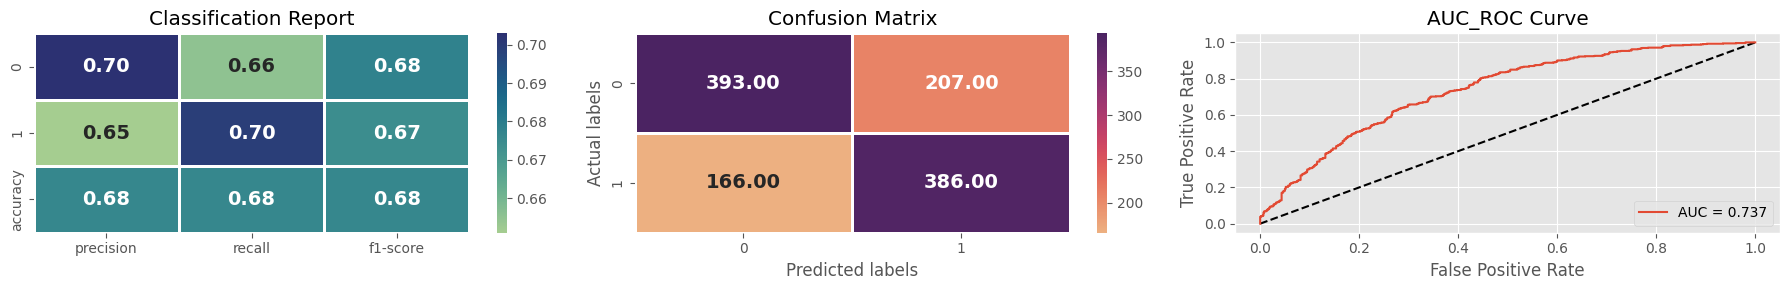

LogisticRegression(max_iter=20000, random_state=0)

In [ ]:
# Fiting the logistic regression and evaluate all the evalution matrices
log_classifier = LogisticRegression(fit_intercept=True, penalty='l2',max_iter=20000,random_state=0)
analyse_model(log_classifier, x_train_res, x_test_res, y_train_res, y_test_res)

#### **Random Forest Classifier :**

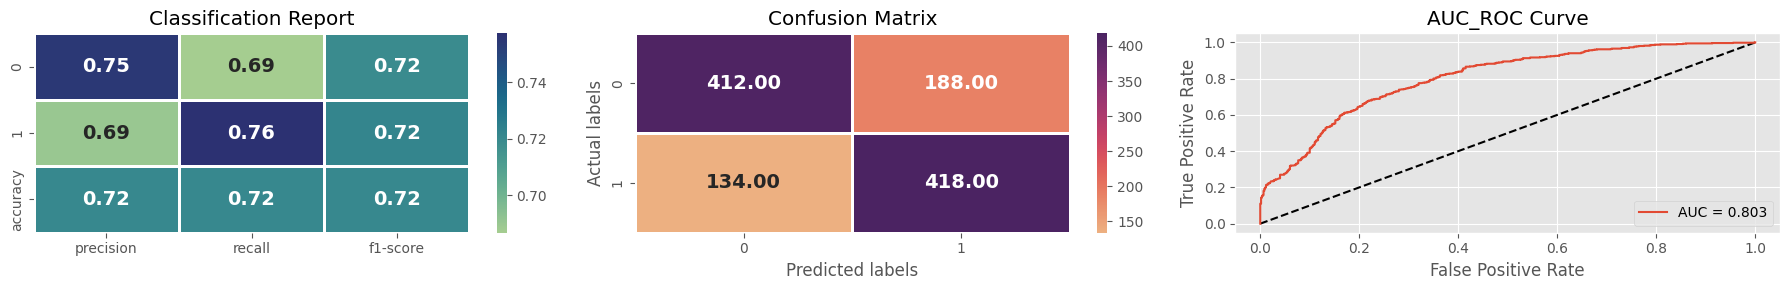

RandomForestClassifier(max_depth=3, n_estimators=500, n_jobs=-1, random_state=0)

In [ ]:
# Fitting the Random Forest classifier and evaluate the evaluation matrices
Rf_classifier = RandomForestClassifier(n_estimators=500,max_depth=3,n_jobs=-1,random_state=0)
analyse_model(Rf_classifier, x_train_res, x_test_res, y_train_res, y_test_res)

#### **Hyperparameter tuning - Random Forest Classifier**



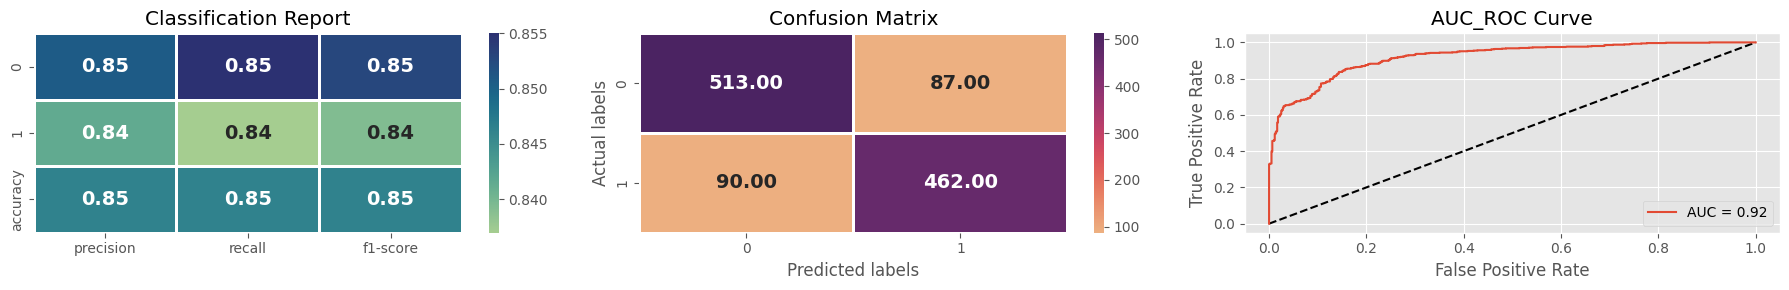

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=500,
                                              n_jobs=-1, random_state=0),
             param_grid={'max_depth': [7, 8, 10],
                         'n_estimators': [150, 250, 300, 350]},
             scoring='roc_auc')

In [ ]:
# Defining parameters

param_grid = {'n_estimators':[150,250,300,350], 'max_depth':[7,8,10]}

# Fitting RandomForestClassifier Model with GridSearchCV
Rf_grid_classifier = GridSearchCV(Rf_classifier, param_grid = param_grid, scoring = 'roc_auc', cv=5)

# Analysing the model
analyse_model(Rf_grid_classifier, x_train_res, x_test_res, y_train_res, y_test_res)


#### **Naive Bayes Classifier :**

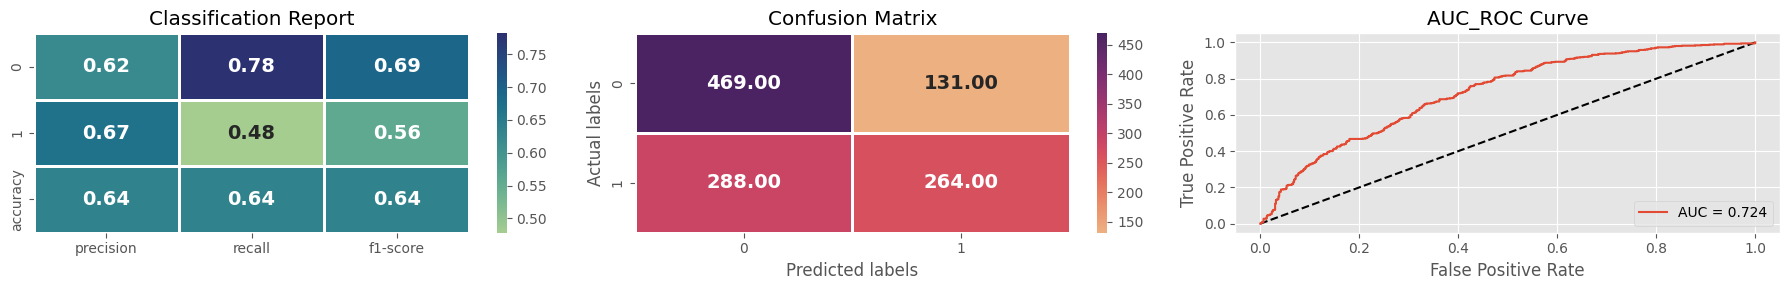

GaussianNB()

In [ ]:
# Fitting the Naive bayes classifier and evaluate all the evaluation matrices

NB_classifier = GaussianNB()

# Analysing the model
analyse_model(NB_classifier, x_train_res, x_test_res, y_train_res, y_test_res)

#### **K-Nearest neighbors Classsifier :**

In [ ]:
# Train a KNN classifier for different values of k
k_values = range(1, 50)
train_accuracies = []
test_accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_res, y_train_res)

    # Calculate the training and testing accuracies
    train_accuracy = knn.score(x_train_res, y_train_res)
    test_accuracy = knn.score(x_test_res, y_test_res)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

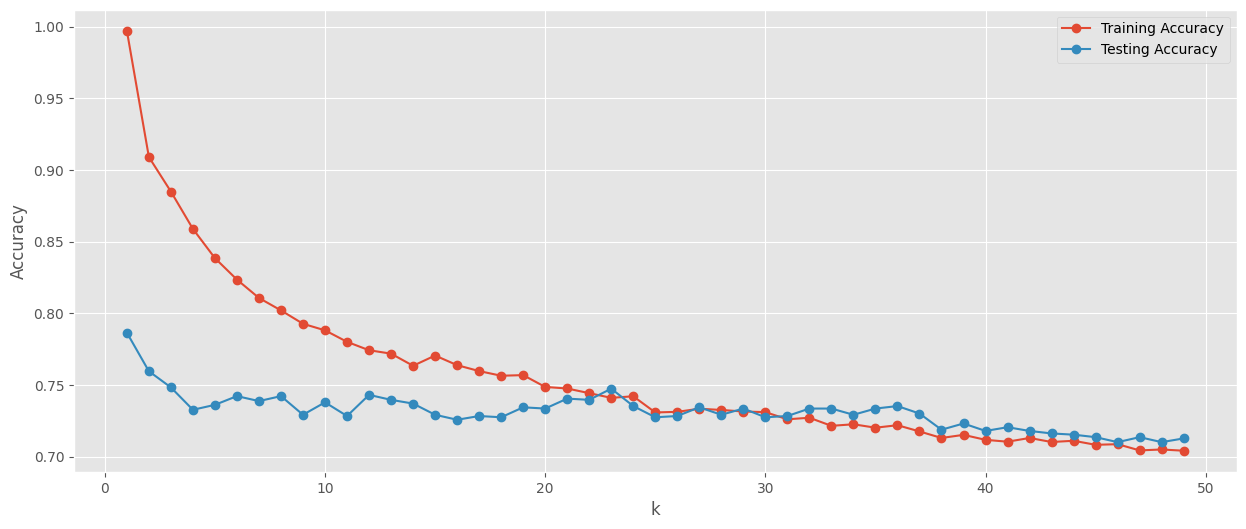

In [ ]:
# Plot the training and testing accuracy curves
plt.figure(figsize = (15,6))
plt.plot(k_values, train_accuracies, label='Training Accuracy',marker='o')
plt.plot(k_values, test_accuracies, label='Testing Accuracy', marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The best value of k for the k-nearest neighbors classifier is 5. This value was chosen based on the training and testing accuracy curves, which showed that the model performed best with this value of k. A k-nearest neighbors classifier with k = 5 is a relatively simple model, which means that it is less likely to overfit the training data.

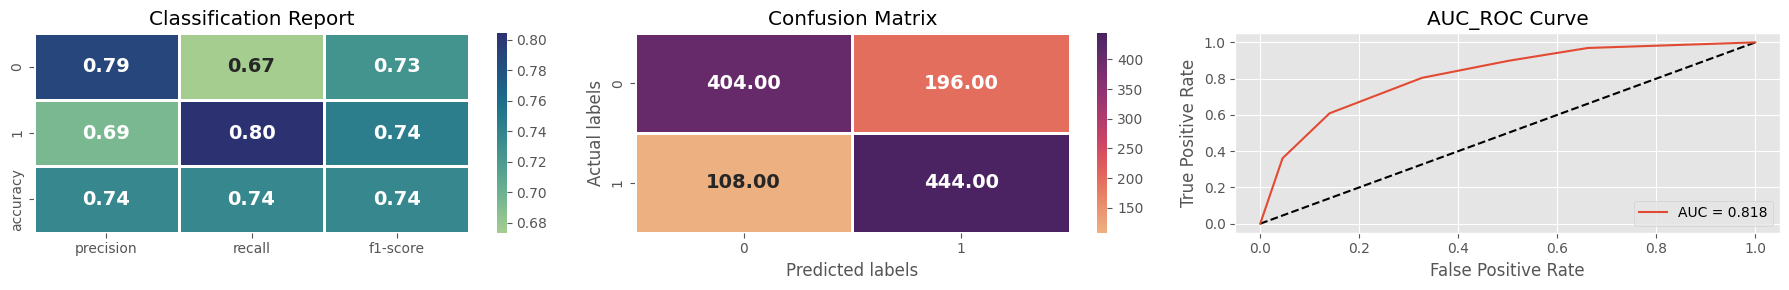

{'n_neighbors': 5}

In [ ]:
# Defining classifier instance
classifier= KNeighborsClassifier()

# Defining parameters
grid_values = {'n_neighbors' : [1,5,9,15,20]}

# Fitting KNeighborsClassifier Model with GridSearchCV
KNN_grid_classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Analysing the model
s = analyse_model(KNN_grid_classifier, x_train_res, x_test_res, y_train_res, y_test_res)
s.best_params_

#### **Support Vector Machine :**

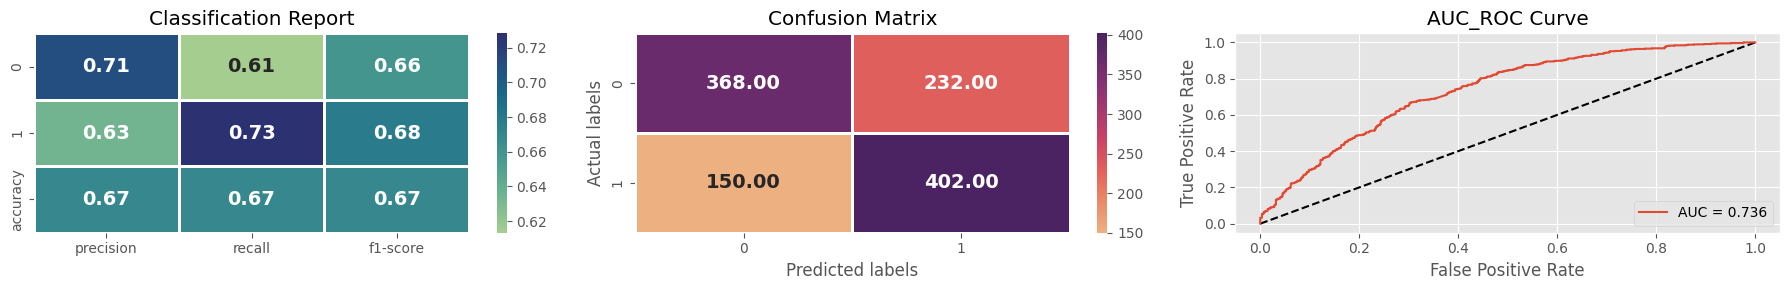

SVC(kernel='linear', probability=True, random_state=0)

In [ ]:
# Fitting the SVM model and evaluate all the evaluation matrices.
SVM_classifier = SVC(kernel = 'linear', probability=True, random_state=0)

# Analyse the model
analyse_model(SVM_classifier, x_train_res, x_test_res, y_train_res, y_test_res)

#### **Hyperparameter tuning - SVM Classifier**



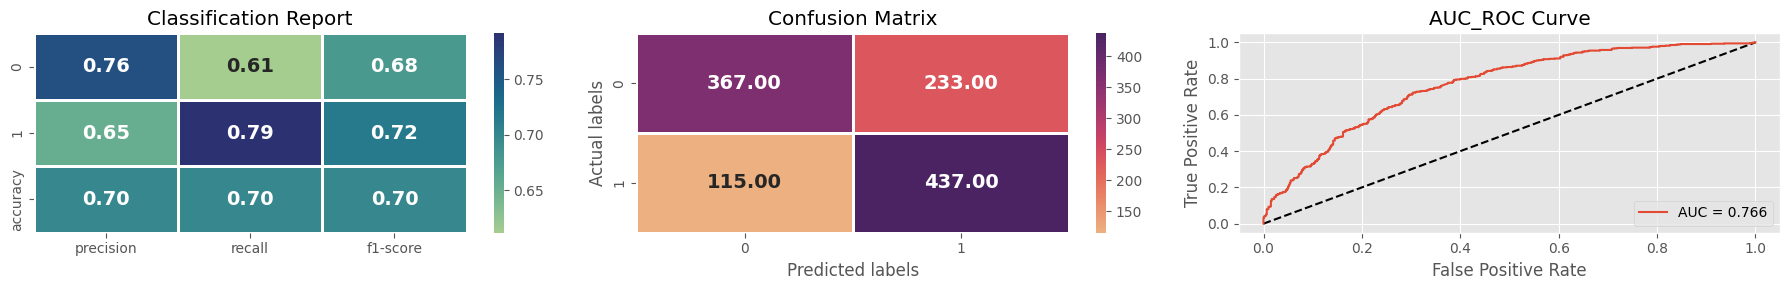

GridSearchCV(cv=3,
             estimator=SVC(kernel='linear', probability=True, random_state=0),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['rbf', 'poly', 'sigmoid'],
                         'max_iter': [2000]},
             scoring='roc_auc')

In [ ]:
# Defining parameters
param_grid = {'kernel': ["rbf","poly","sigmoid"], 'C': [0.1, 1, 10], 'max_iter' : [2000]}

# Fitting RandomForestClassifier Model with GridSearchCV
SVM_grid_classifier = GridSearchCV(SVM_classifier, param_grid = param_grid, scoring = 'roc_auc', cv=3)

# Analysing the model
analyse_model(SVM_grid_classifier, x_train_res, x_test_res, y_train_res, y_test_res)

1. **Which evaluation metrics I choose and why ?**

  Since our data is of healthcare so we have majorly focuses on Recall because,
     - Recall focuses on finding all the people who have the disease, so it helps catch as many cases as possible. Missing a true positive case is riskier because it means not identifying someone who needs medical attention.

     - While precision is also important, having a few false alarms (people mistakenly labeled as having the disease when they don't) is generally less concerning because these can be double-checked with more tests.

  So, to keep things simple, aim for higher recall in cardiovascular disease classification to make sure I don't miss anyone who needs help.To determine how better our model is doing we have consider Accuracy and AUC-ROC score to get the percentage of correct predictions of either of the classes among all the predictions made by the model.

2. **Which ML model did I choose from the above created models as my final prediction model and why?**


In [ ]:
# Create a list of model names
model_names = ['Logistic Regression', 'Random forest classifier', 'Naive bayes classifier', 'KNN classifier','SVM classifier']

# Create empty lists to store the metric values for each model
precisions = []
recalls = []
f1_scores = []
accuracies = []
auc_roc_scores = []

# Loop through each model
for model in [log_classifier, Rf_grid_classifier, NB_classifier, KNN_grid_classifier, SVM_grid_classifier]:
    y_pred = model.predict(x_test_res)

    precision = precision_score(y_test_res, y_pred)
    recall = recall_score(y_test_res, y_pred)
    f1 = f1_score(y_test_res, y_pred)
    accuracy = accuracy_score(y_test_res, y_pred)

    # Ensure your model returns probability scores for AUC-ROC calculation
    y_pred_prob = model.predict_proba(x_test_res)[:, 1]
    auc_roc = roc_auc_score(y_test_res, y_pred_prob)

    # Append the metric values to the respective lists
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    accuracies.append(accuracy)
    auc_roc_scores.append(auc_roc)

# Create a DataFrame to store the metrics for each model
metrics_df = pd.DataFrame({
    'Model': model_names,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores,
    'Accuracy': accuracies,
    'AUC-ROC Score': auc_roc_scores
})

# Display the DataFrame
metrics_df


Model  Precision    Recall  F1 Score  Accuracy  \
0       Logistic Regression   0.650927  0.699275  0.674236  0.676215   
1  Random forest classifier   0.841530  0.836957  0.839237  0.846354   
2    Naive bayes classifier   0.668354  0.478261  0.557550  0.636285   
3            KNN classifier   0.693750  0.804348  0.744966  0.736111   
4            SVM classifier   0.652239  0.791667  0.715221  0.697917   

   AUC-ROC Score  
0       0.737360  
1       0.920246  
2       0.724047  
3       0.817580  
4       0.765841

  As a result, I chosen the Random Forest classifier as the preferred model for our cardiovascular disease classification task. We believe this model provides a robust and reliable solution, minimizing the risk of false negatives and ensuring that individuals at risk receive the necessary medical attention.

####**Feature importance :**

In [ ]:
# Checking the percentage of feature importance
features = final_df.columns
importances = Rf_classifier.feature_importances_
feature_imp = pd.DataFrame(columns = ['Features','Importance of Feature in %'])
feature_imp['Features'] = features[:-1]
feature_imp['Importance of Feature in %']= importances*100
feature_imp.sort_values(by="Importance of Feature in %", axis=0, ascending=False)

Features  Importance of Feature in %
0               age                   40.862677
7    pulse_pressure                   25.903407
1         education                   20.516325
3        cigsPerDay                    5.377613
4            BPMeds                    5.213280
6      prevalentHyp                    1.742524
2               sex                    0.239950
5   prevalentStroke                    0.085864
8  glucose_diabetes                    0.058360

From the above it is clear that for Random forest model "age" is contributing maximum i.e 40.86% in the final outcome, "pulse_pressure" is contributing 25% followed by "education", "cigsPerDay" and "BPMeds".

### **Future Work**

In [ ]:
# Save the File
joblib.dump(Rf_grid_classifier, 'CHD_prediction.joblib')

['CHD_prediction.joblib']

In [ ]:
# Load the File and predict unseen data.
model = joblib.load('CHD_prediction.joblib')
data = final_df[["age","education","sex","cigsPerDay","BPMeds","prevalentStroke","prevalentHyp","pulse_pressure","glucose_diabetes"]]

In [ ]:
# Make predictions using the loaded Random Forest model
predictions = model.predict(data)

# Print the predictions
print(predictions)

[1 1 1 ... 1 1 1]
